In [2]:
#------------Calculating distance from MS (sSFR - sSFR_MS)-----------------
#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np

#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)

def MS_dist(txt_name, redshift_range):
    
    t = ascii.read(txt_name+'_z.txt')
    t['sSFR'] = [0.0]
    t['dist_MS'] = [0.0]
    t['dist_MS_lin'] = [0.0]

    zbin = redshift_range
        
    #Function for the main sequence line, turnover
    def ms_turn(z, Mstar):
        if z == 1:
            ms_turn = 1.55 - np.log10(1+(10**10.1)/(10**Mstar))**1.25
        elif z==1.5:
            ms_turn = 1.9 - np.log10(1+(10**10.2)/(10**Mstar))**1.28

        return ms_turn
    
    #Function for the main sequence line, linear
    def ms_lin(z, Mstar):
        t = cosmo.age(z).value
        ms_lin = (0.84 - 0.026 * t) * Mstar - (6.51 - 0.11 * t)
        return ms_lin

    for i in range(len(t['sSFR'])):
        t['sSFR'] = t['sfr'] - t['M_med']
        if i < zbin[1]:
            t['dist_MS'] = t['sSFR'] - ms_turn(1, t[i]['M_med'])
            t['dist_MS_lin'] = t['sSFR'] - ms_lin(1, t[i]['M_med'])
        elif i > zbin[1] and i < zbin[2]:
            t['dist_MS'] = t['sSFR'] - ms_turn(1.5, t[i]['M_med'])
            t['dist_MS_lin'] = t['sSFR'] - ms_lin(1.5, t[i]['M_med'])

    t.write(txt_name+'_distMS.txt', format='ascii.latex', overwrite=True)

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    MS_dist(k, v)

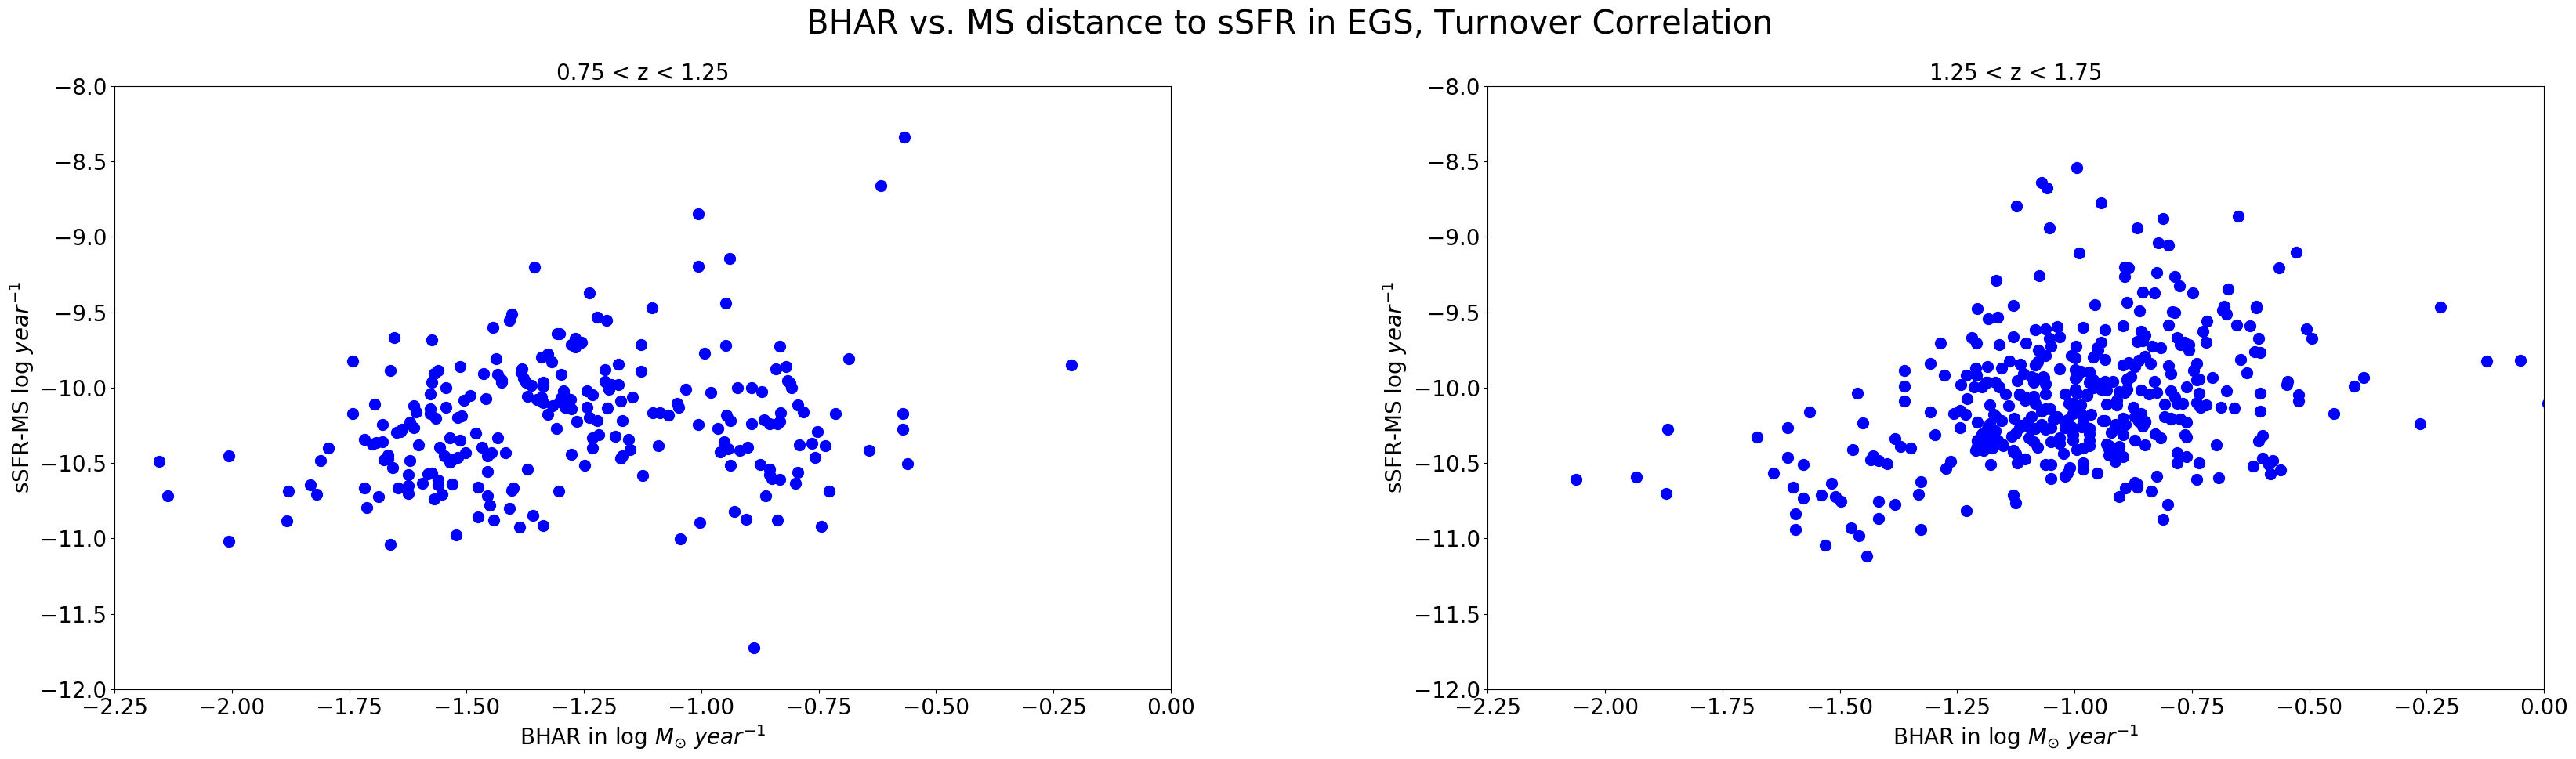

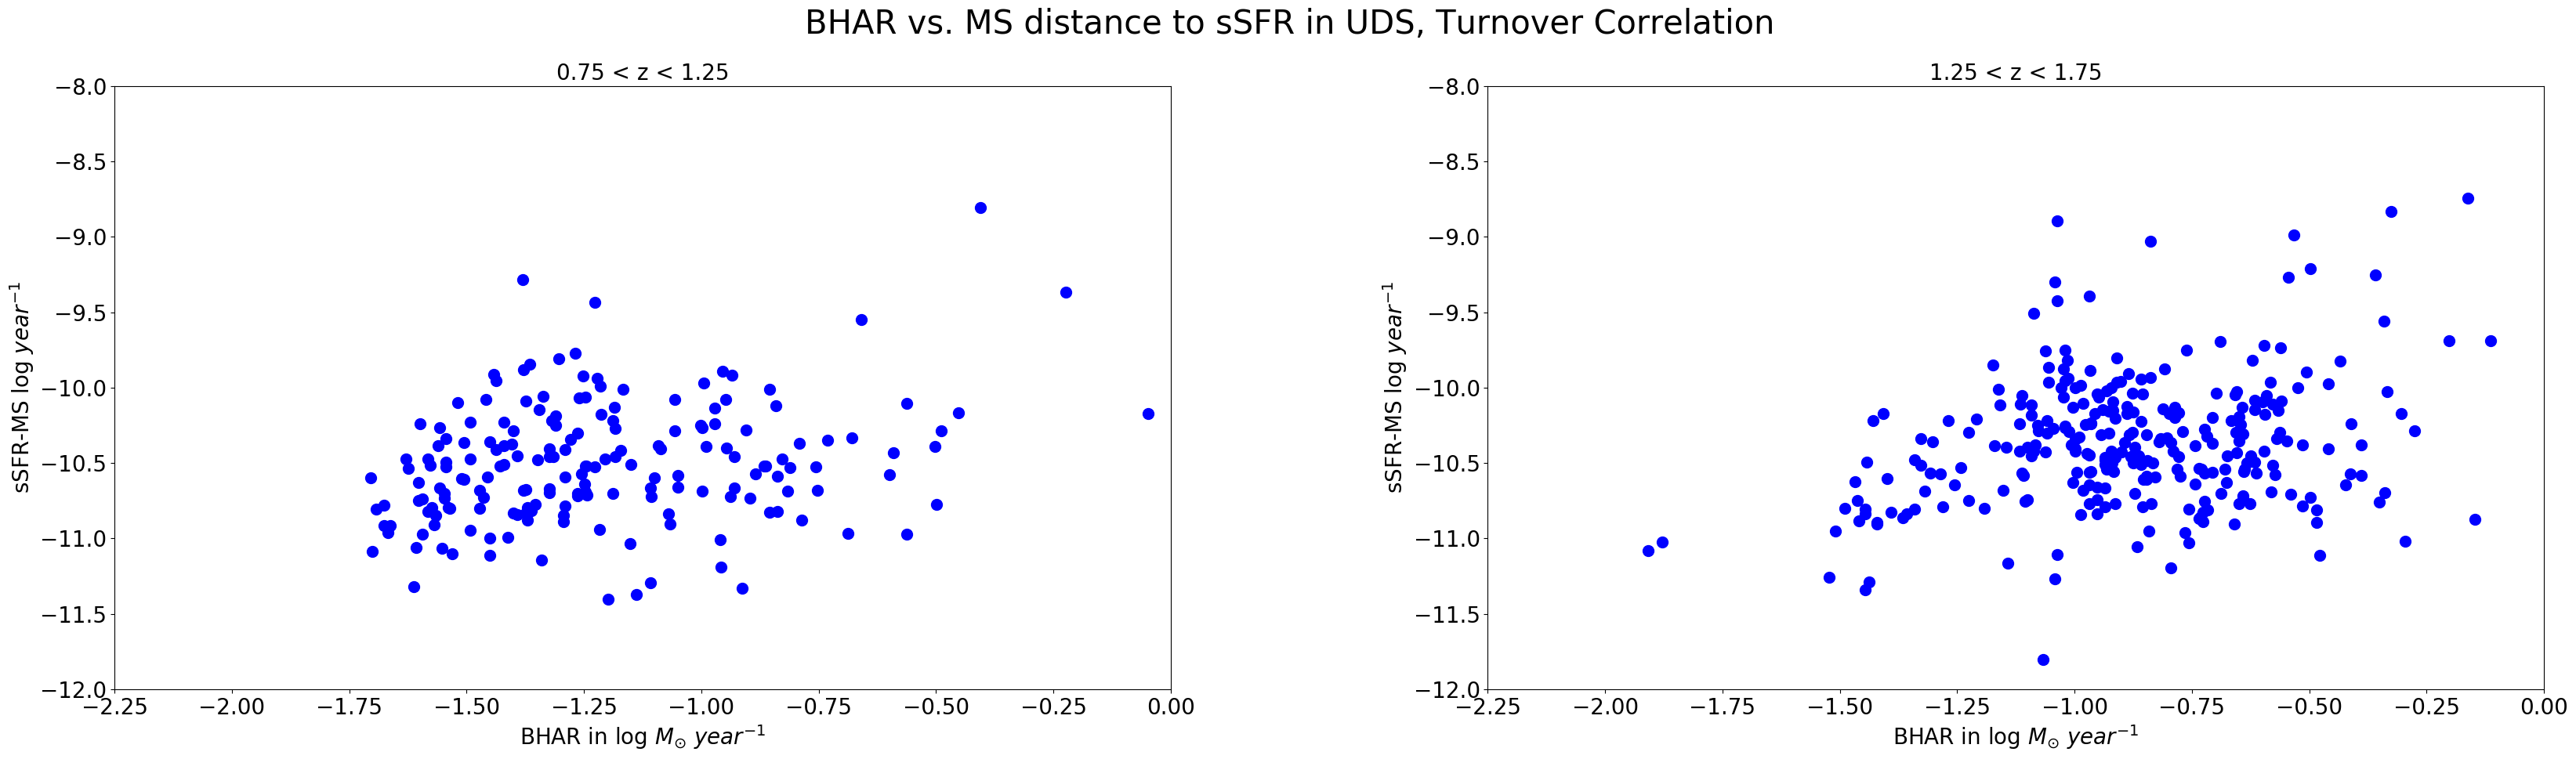

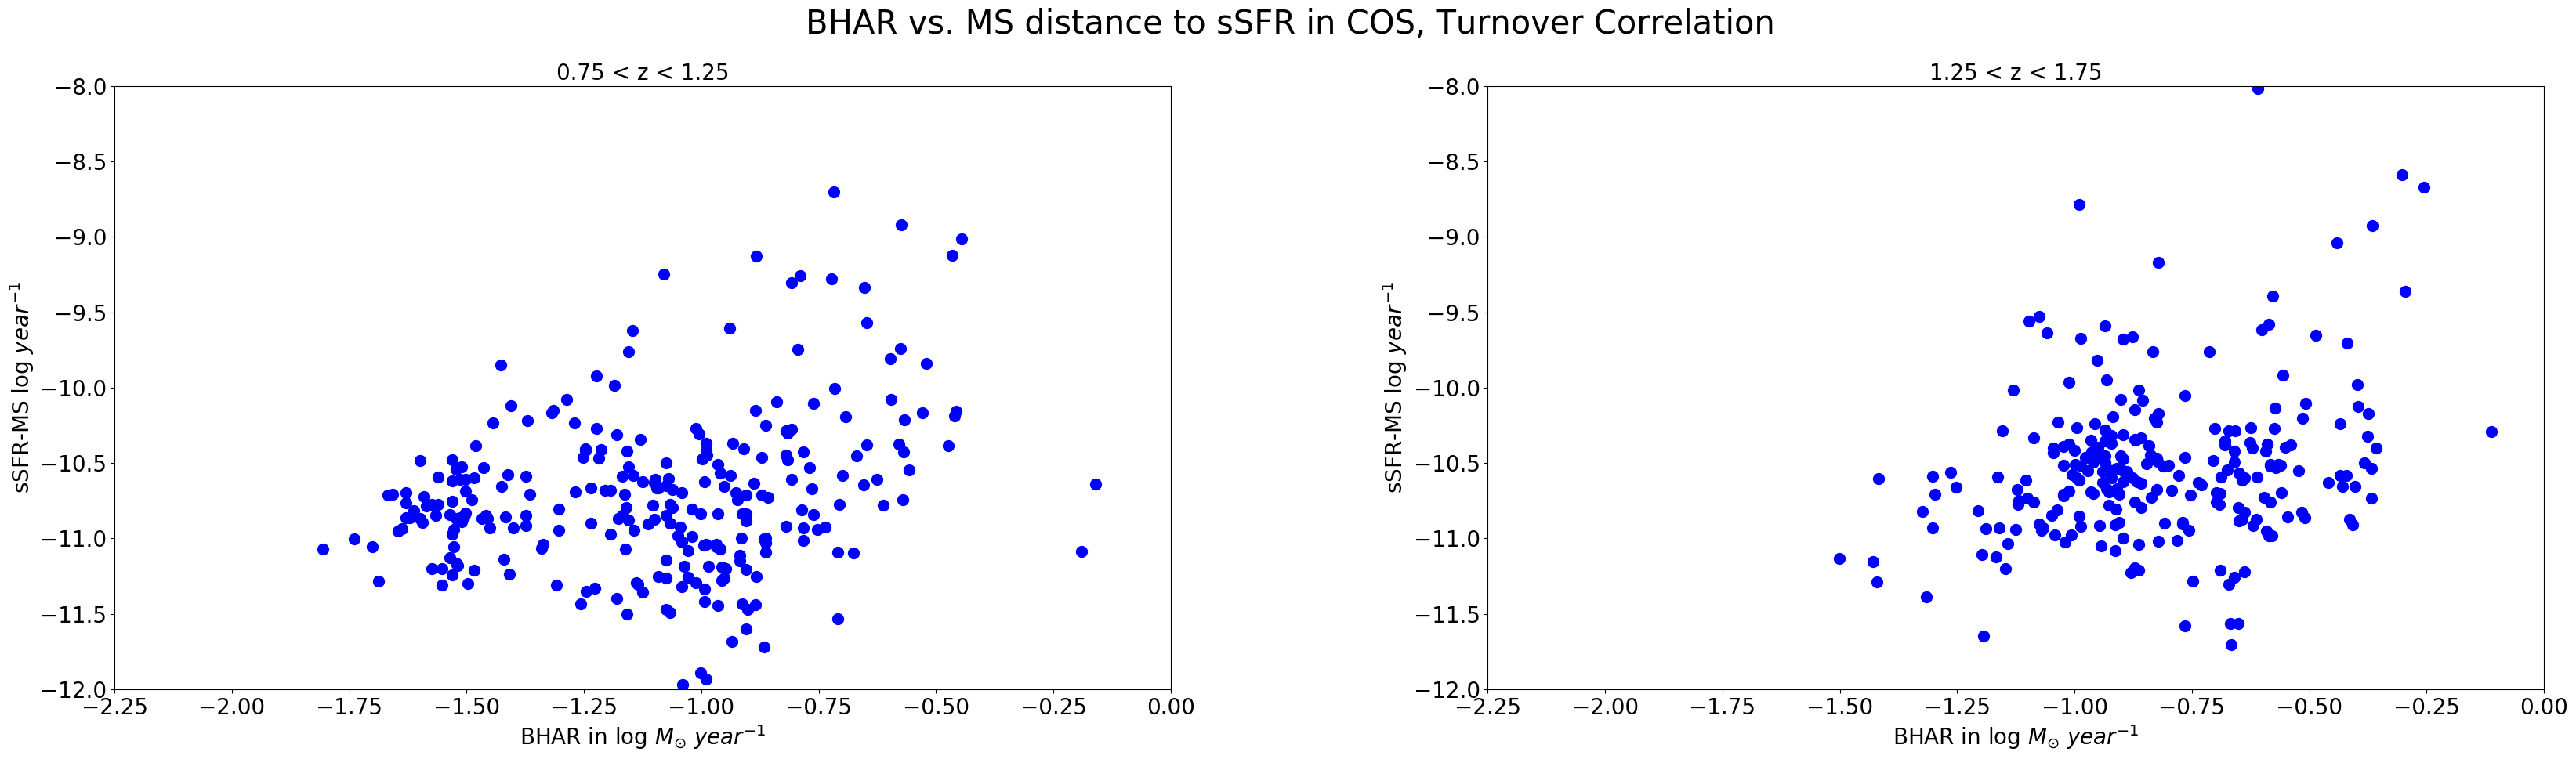

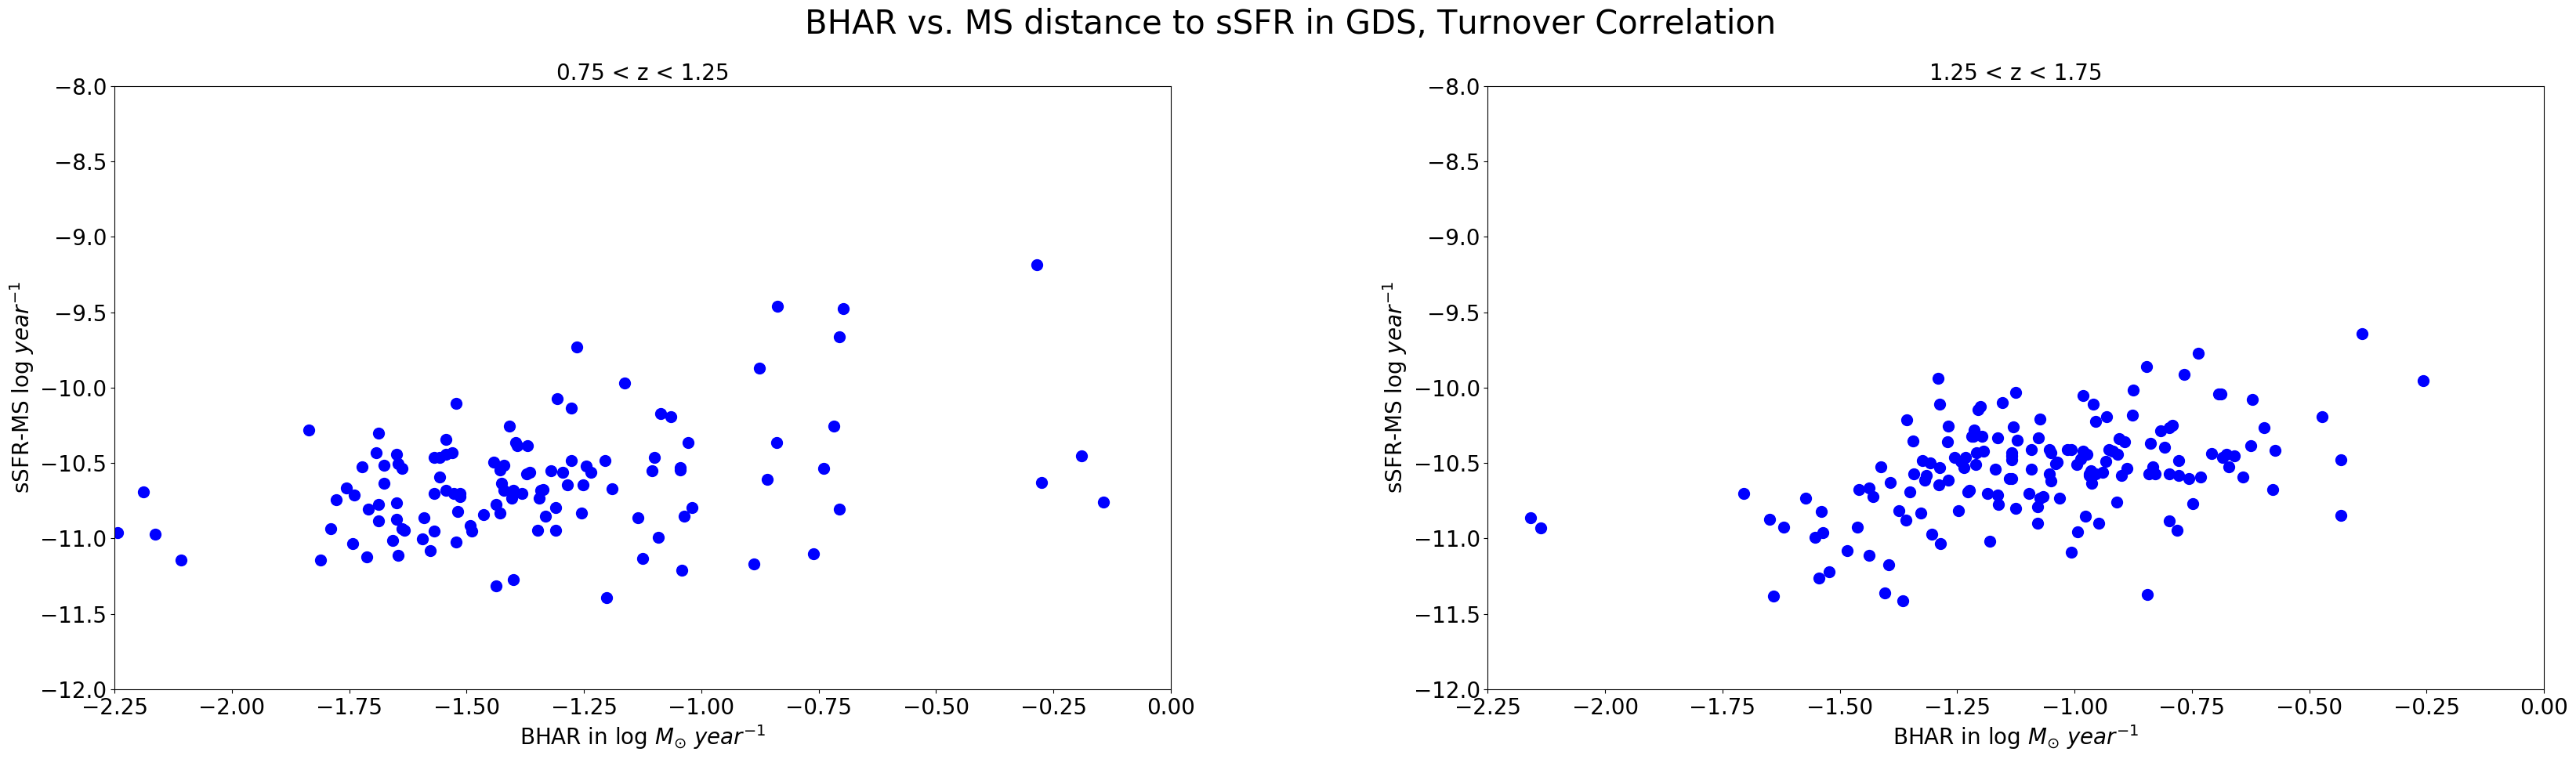

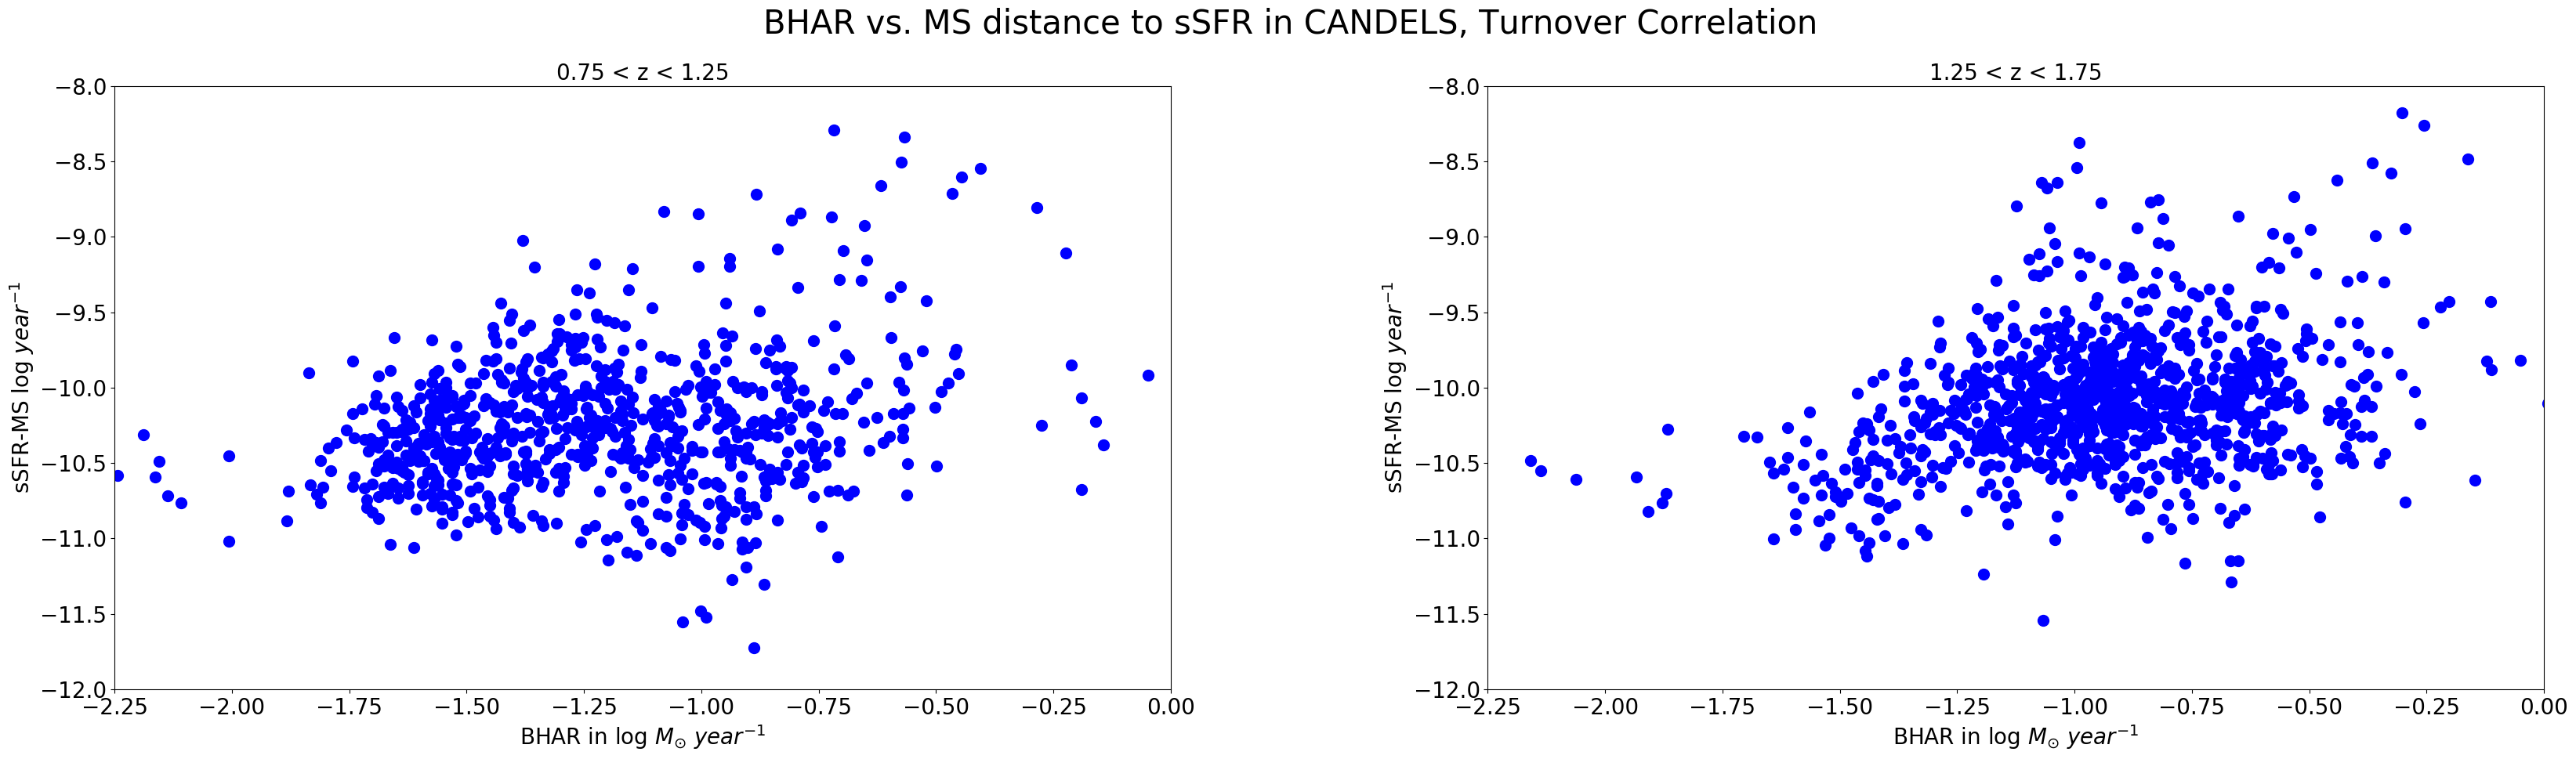

In [6]:
#------------Making scatterplots: BHAR vs. sSFR-MS turnover correlation-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm

#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)


def makeFig(k, v): 
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('BHAR vs. MS distance to sSFR in ' +k+', Turnover Correlation', fontsize=30)

    t = ascii.read(k+'_distMS.txt')

    #lists
    ax = []
    titles = ['0.75','1.25','1.75']
    zbin = v

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('BHAR in log $M_{\odot}$ ${year^{-1}}$', fontsize=20)
        ax[i].set_ylabel('sSFR-MS log ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(-12, -8)
        ax[i].set_xlim(-2.25, 0)

        #The data
        ax[i].scatter(t[zbin[i]:zbin[i+1]]['BHAR'], t[zbin[i]:zbin[i+1]]['dist_MS'],s=100,facecolor=(0,0,1))

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_distsSFR_BHAR_turnover.png', dpi=300, bbox_inches='tight')

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)

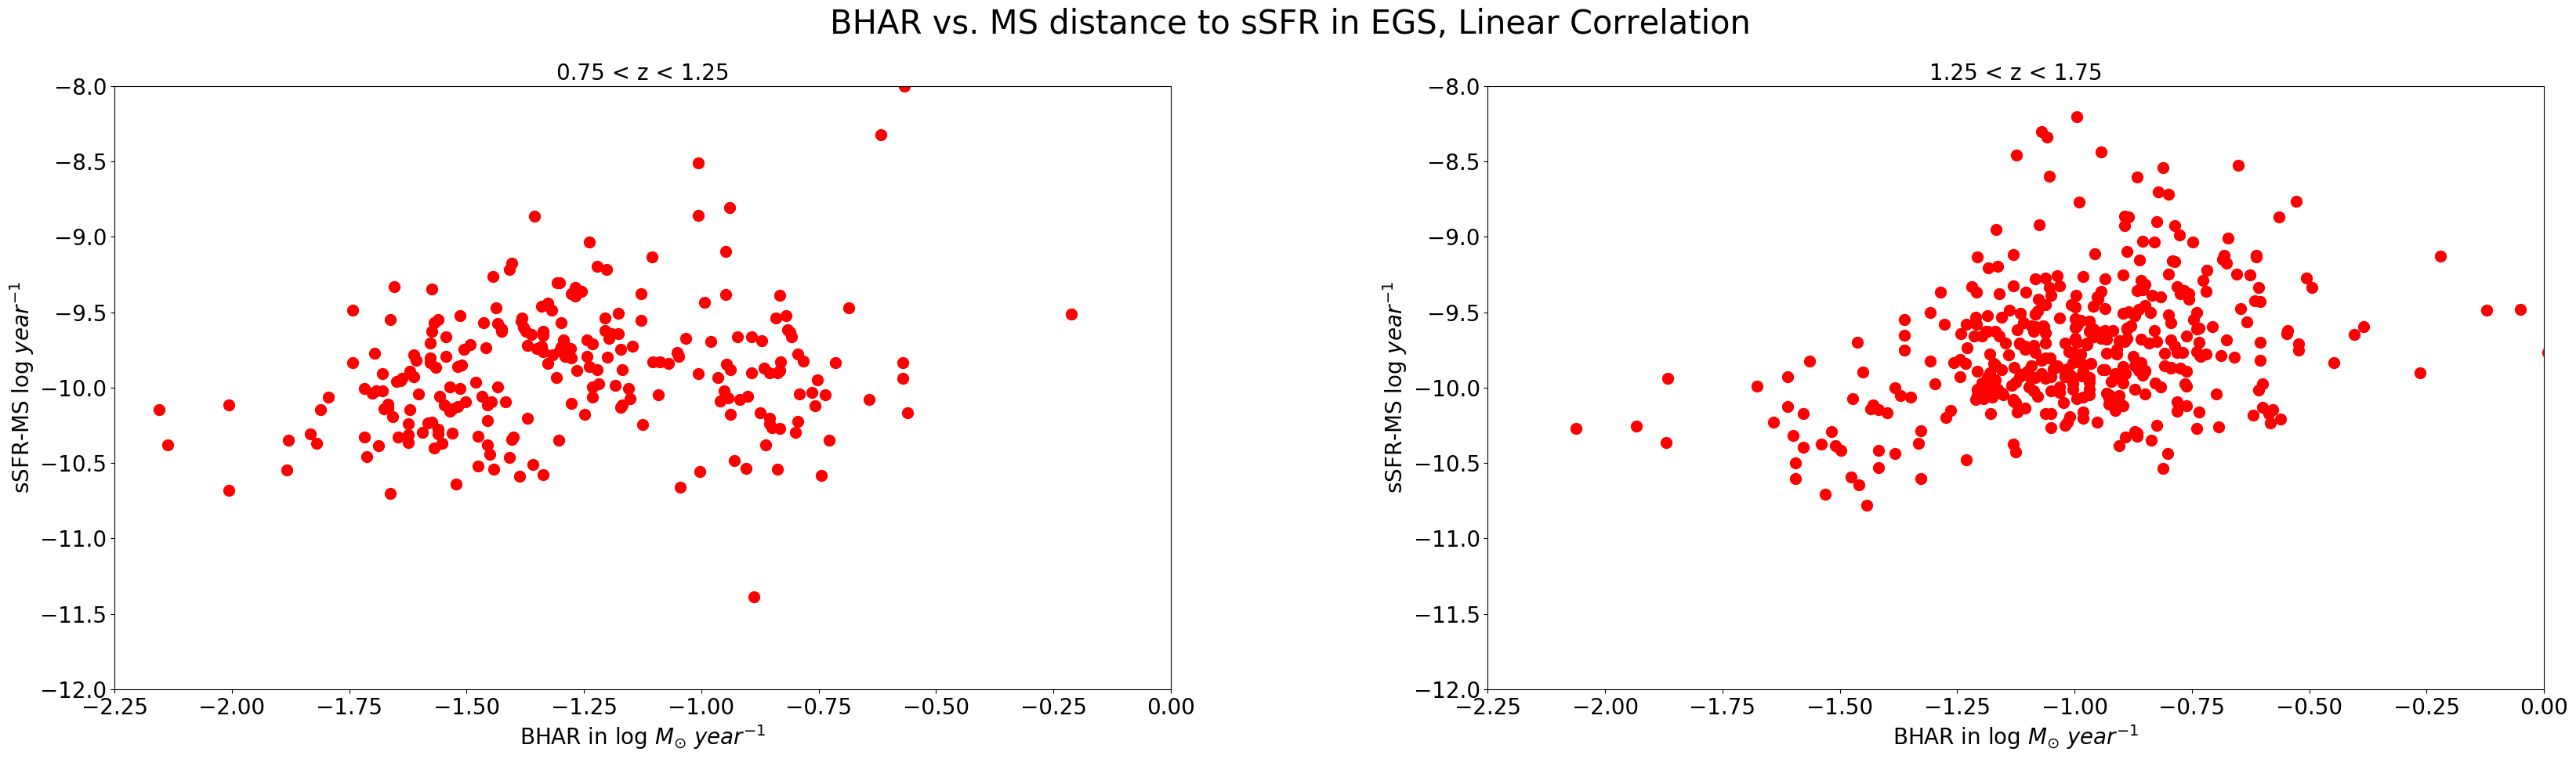

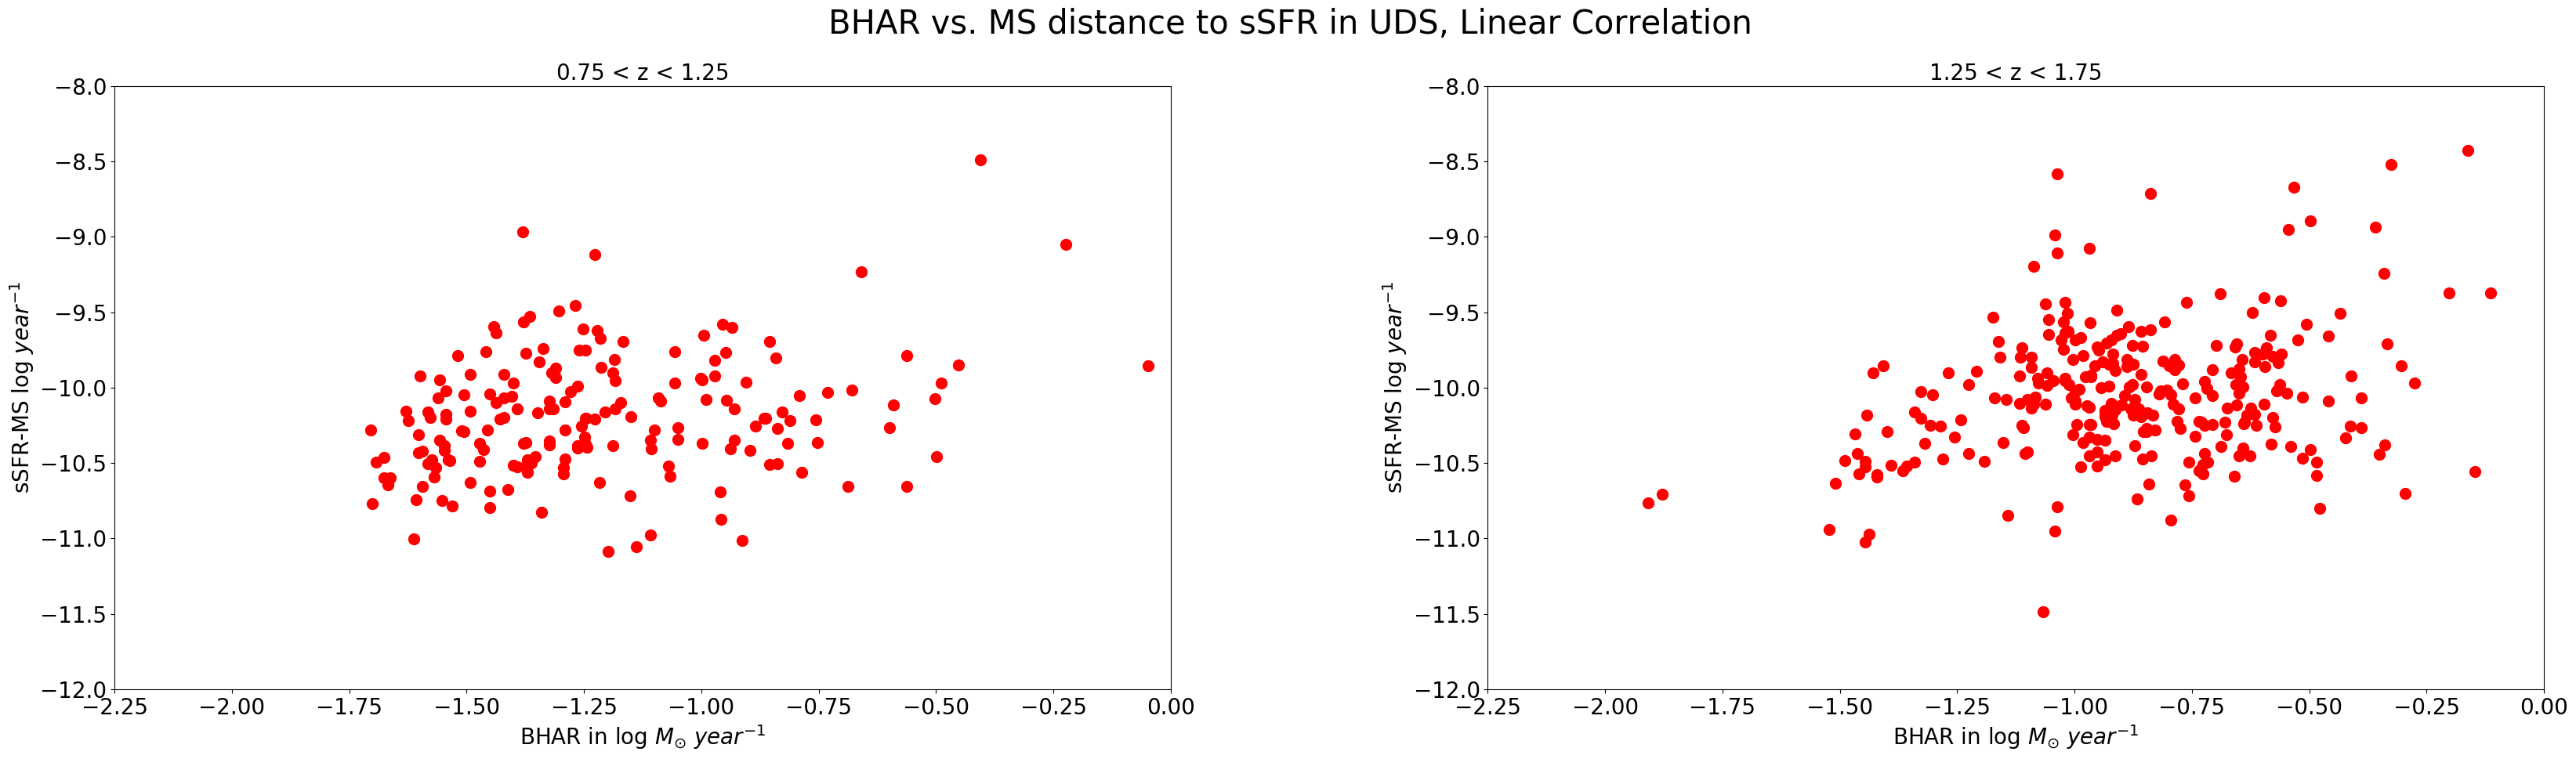

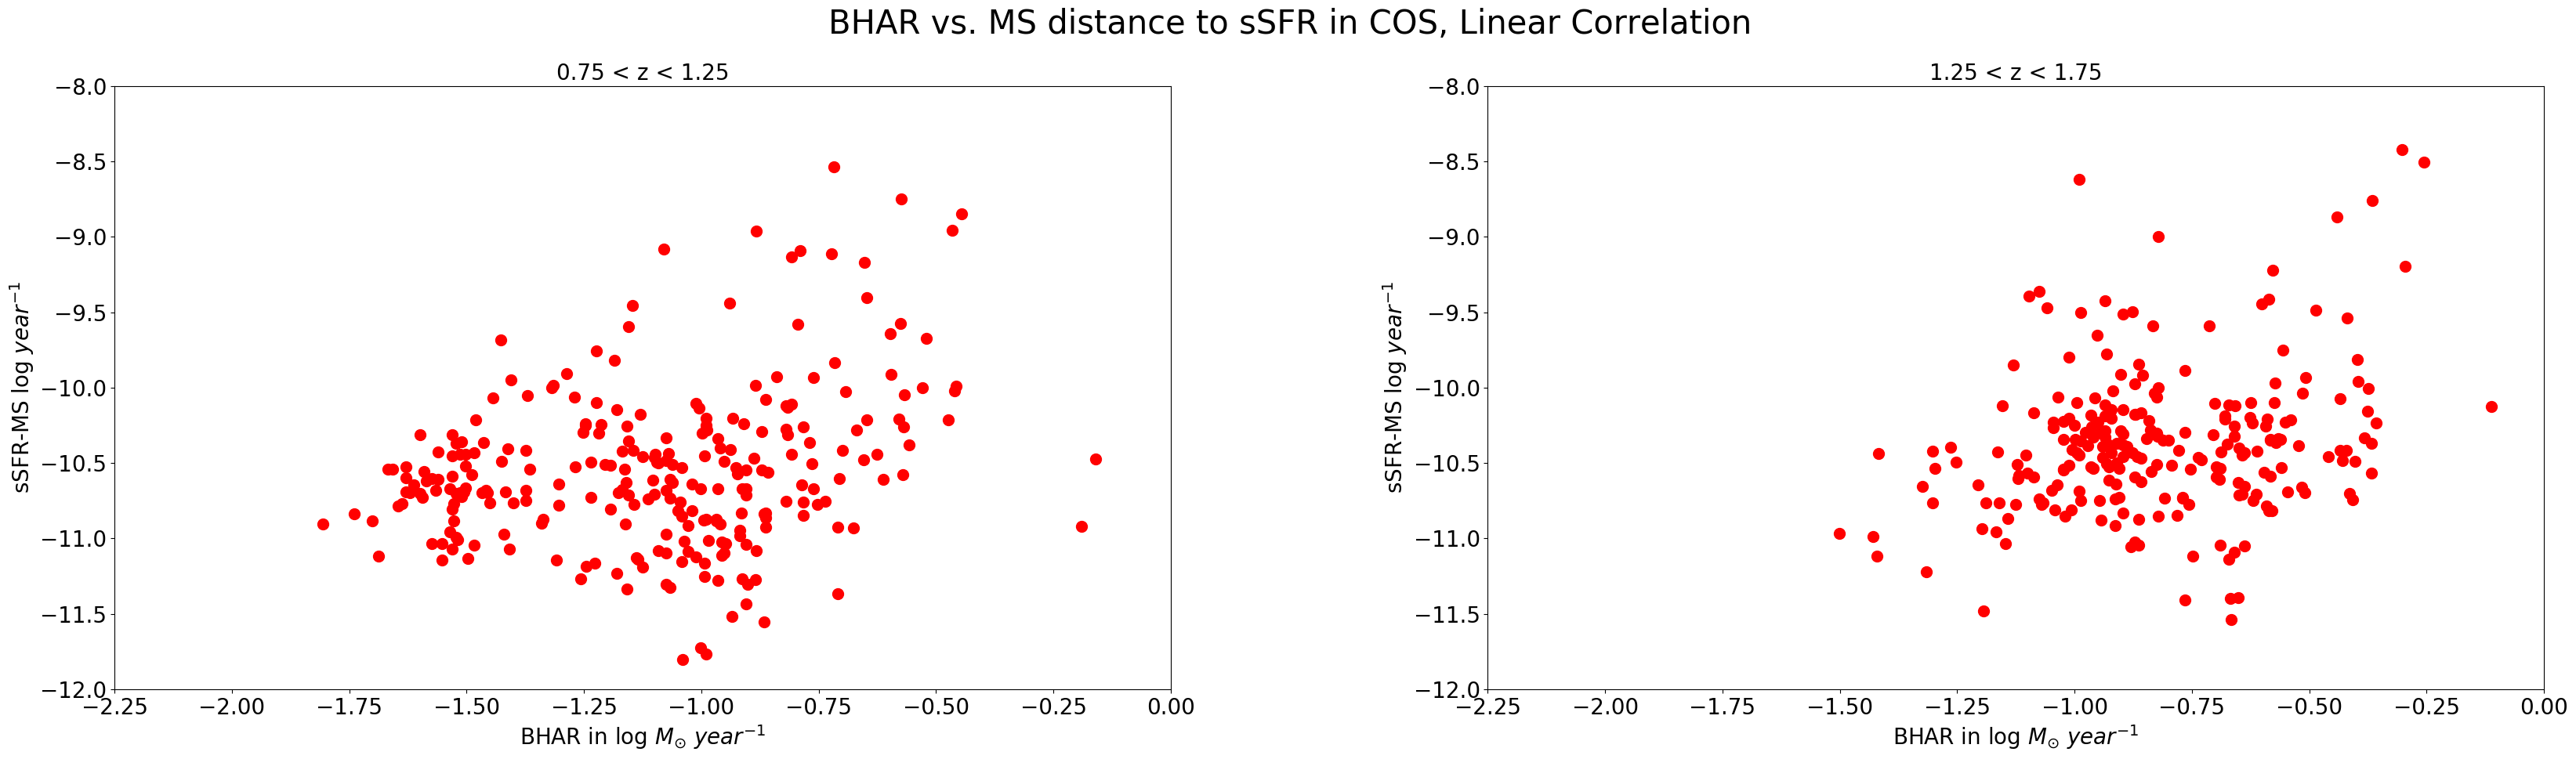

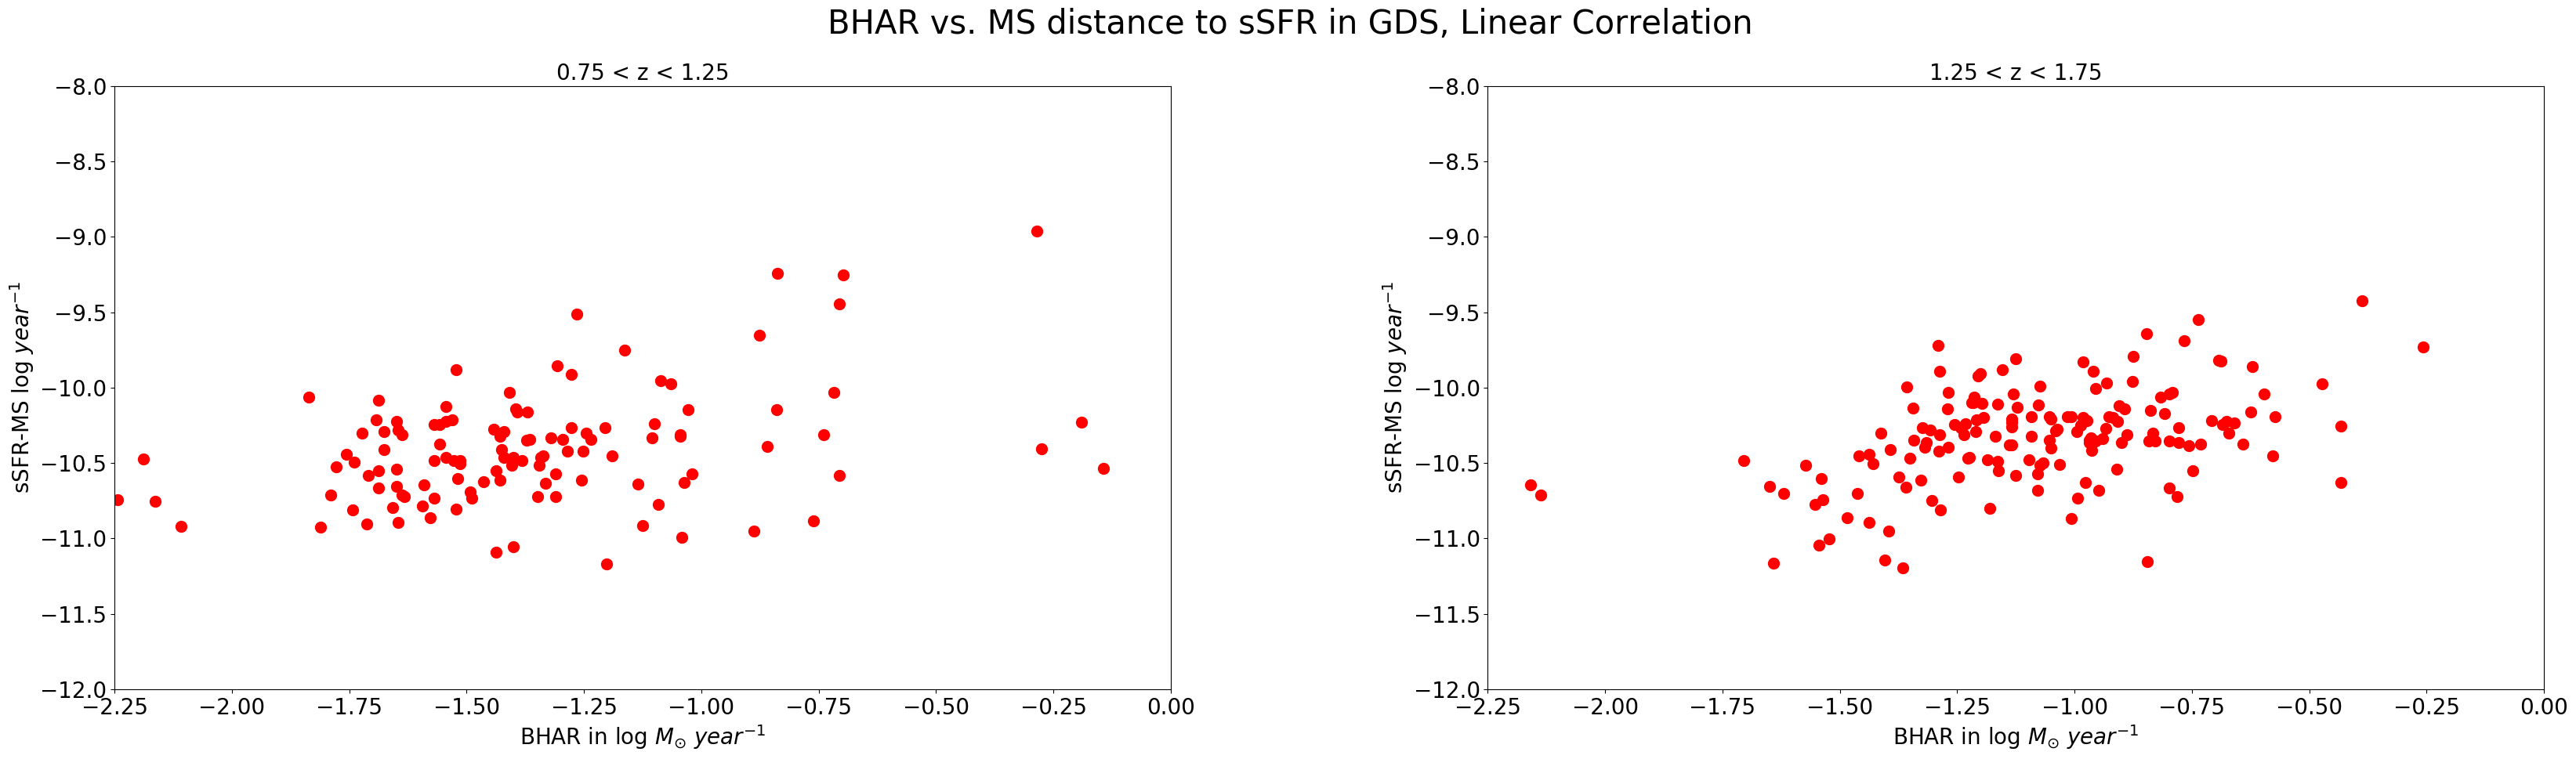

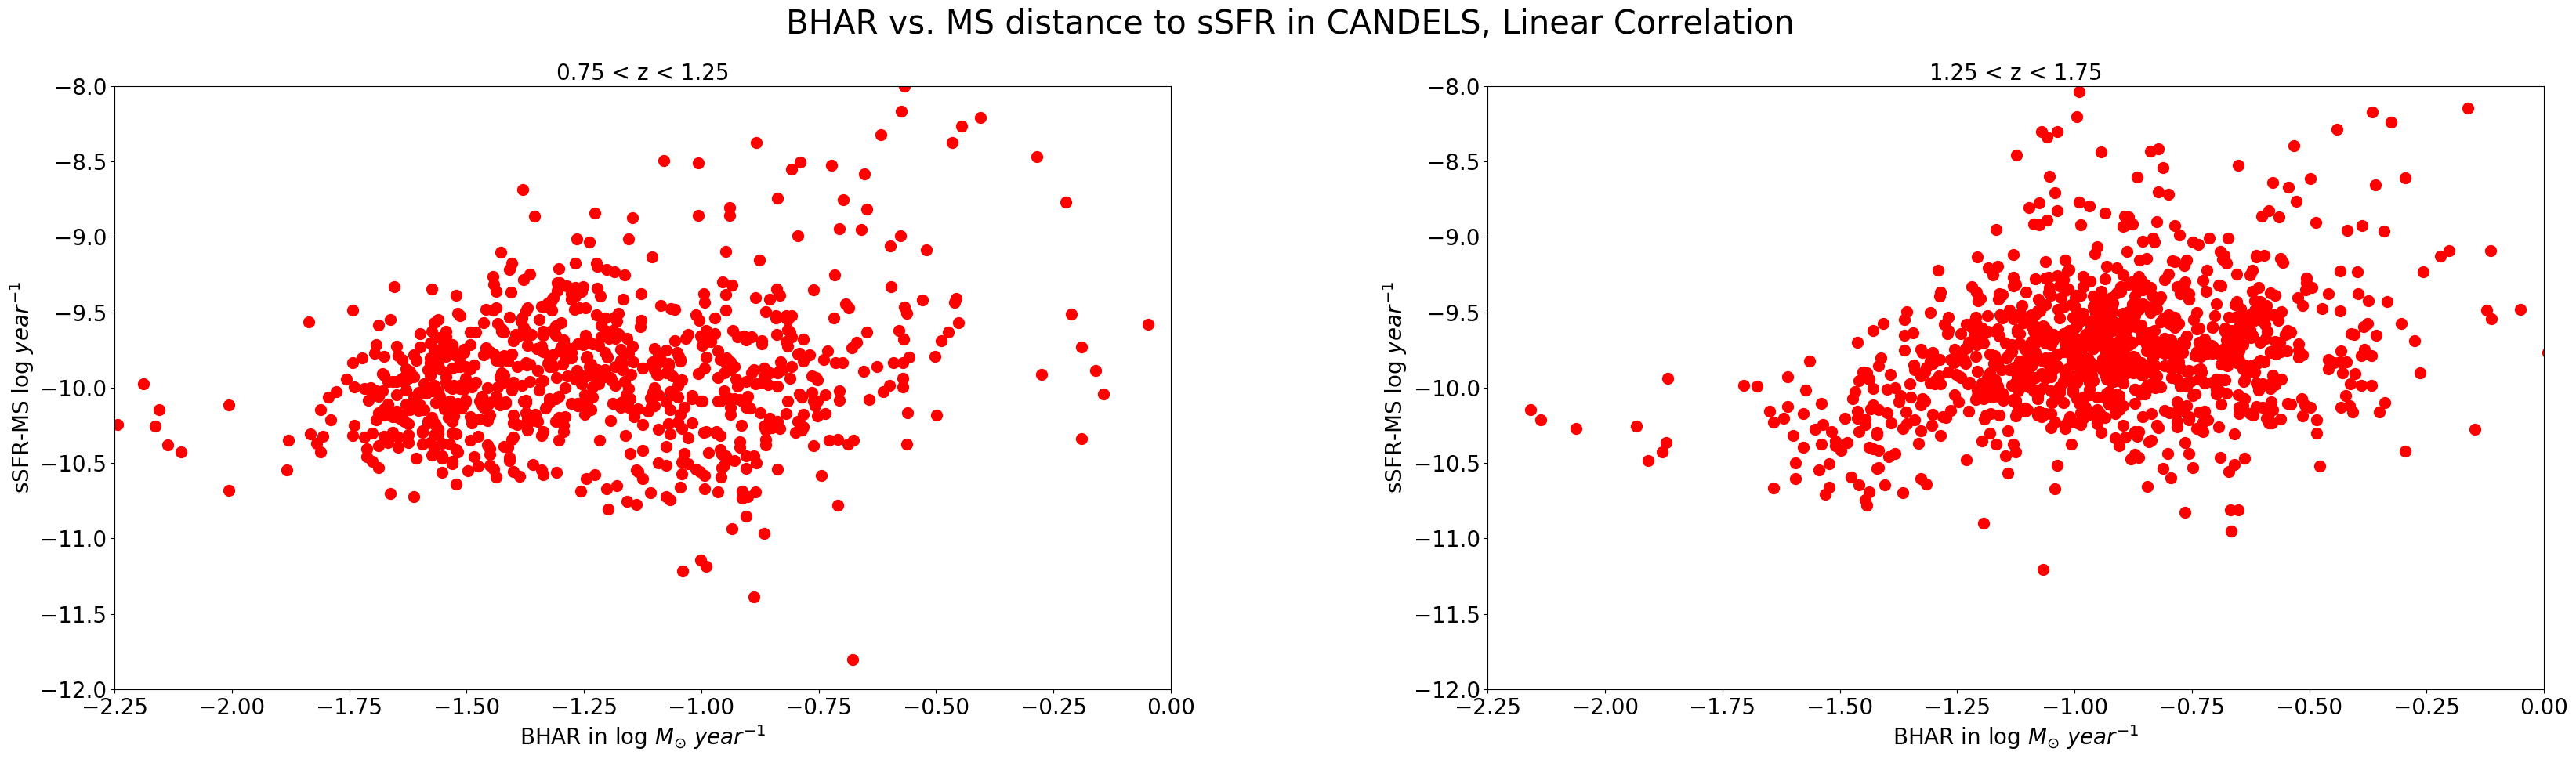

In [8]:
#------------Making scatterplots: BHAR vs. sSFR-MS turnover correlation-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm

#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)


def makeFig(k, v): 
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('BHAR vs. MS distance to sSFR in ' +k+', Linear Correlation', fontsize=30)

    t = ascii.read(k+'_distMS.txt')

    #lists
    ax = []
    titles = ['0.75','1.25','1.75']
    zbin = v

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('BHAR in log $M_{\odot}$ ${year^{-1}}$', fontsize=20)
        ax[i].set_ylabel('sSFR-MS log ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(-12, -8)
        ax[i].set_xlim(-2.25, 0)

        #The data
        ax[i].scatter(t[zbin[i]:zbin[i+1]]['BHAR'], t[zbin[i]:zbin[i+1]]['dist_MS_lin'],s=100,facecolor=(1,0,0))

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_distsSFR_BHAR_lin.png', dpi=300, bbox_inches='tight')

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)

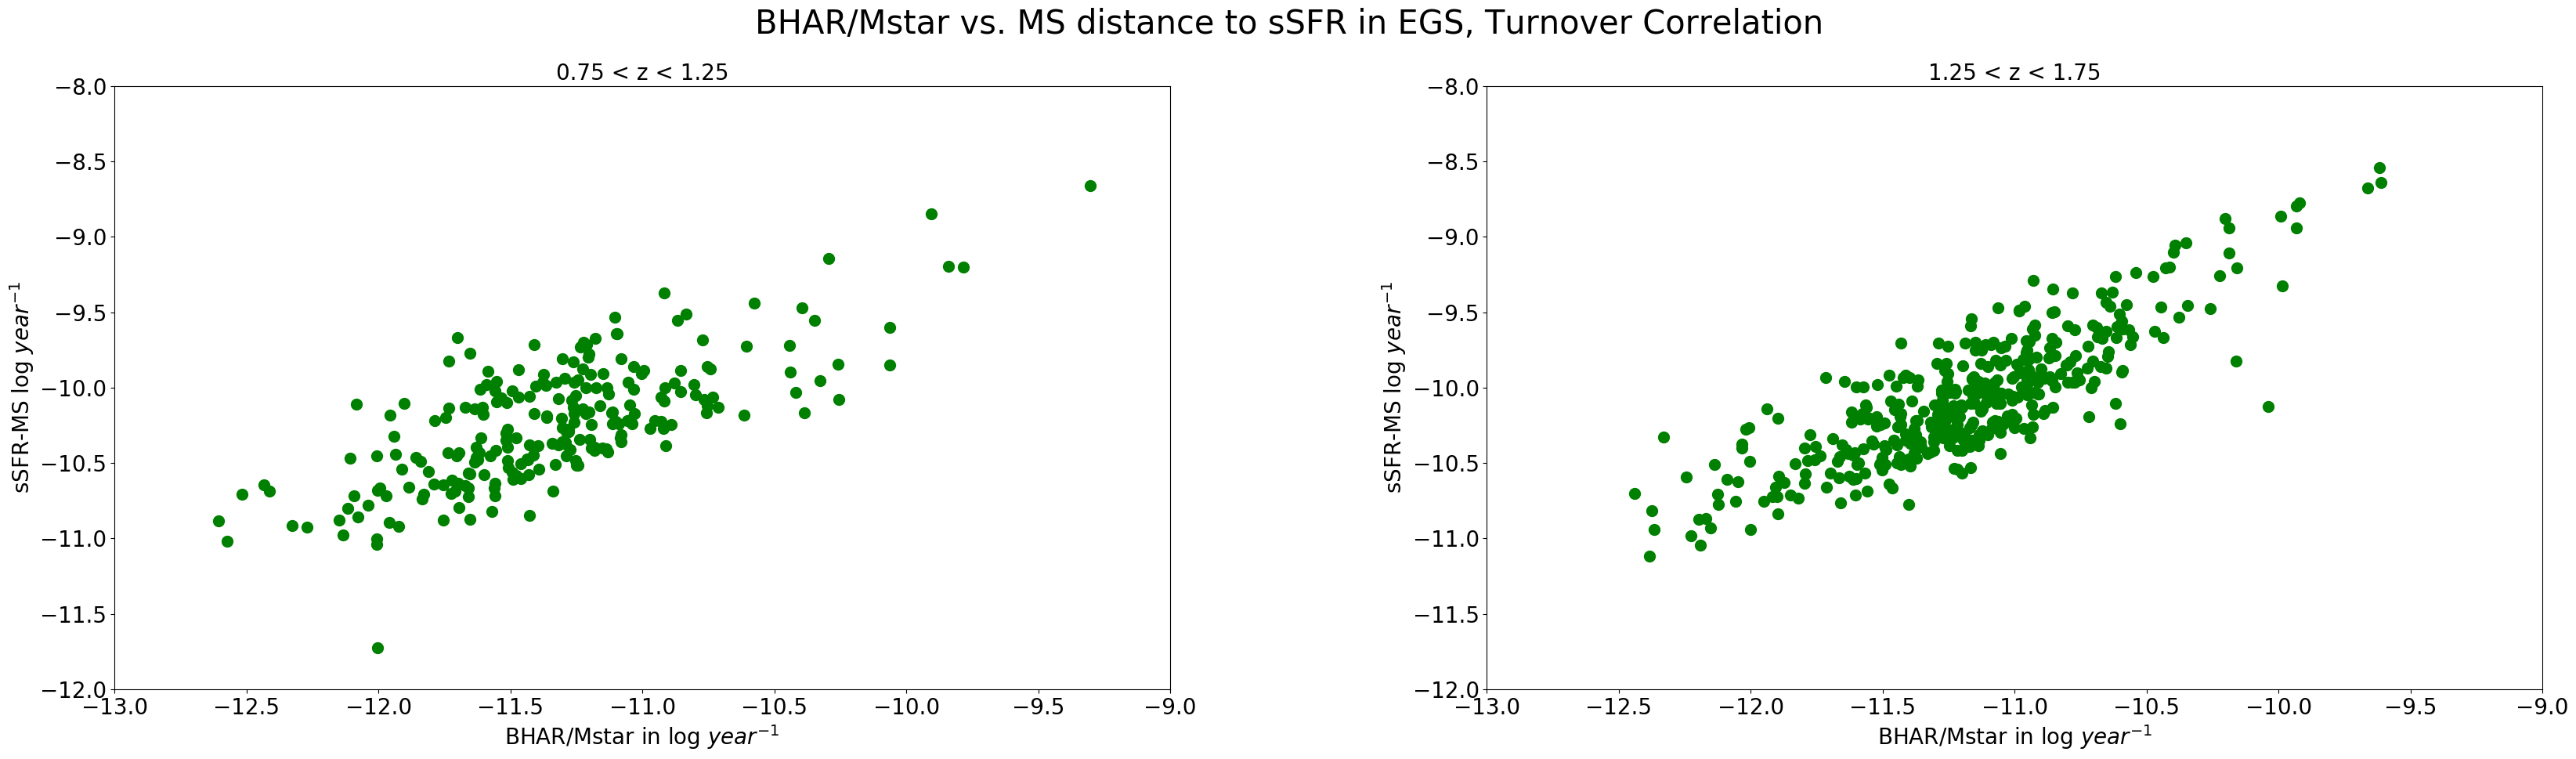

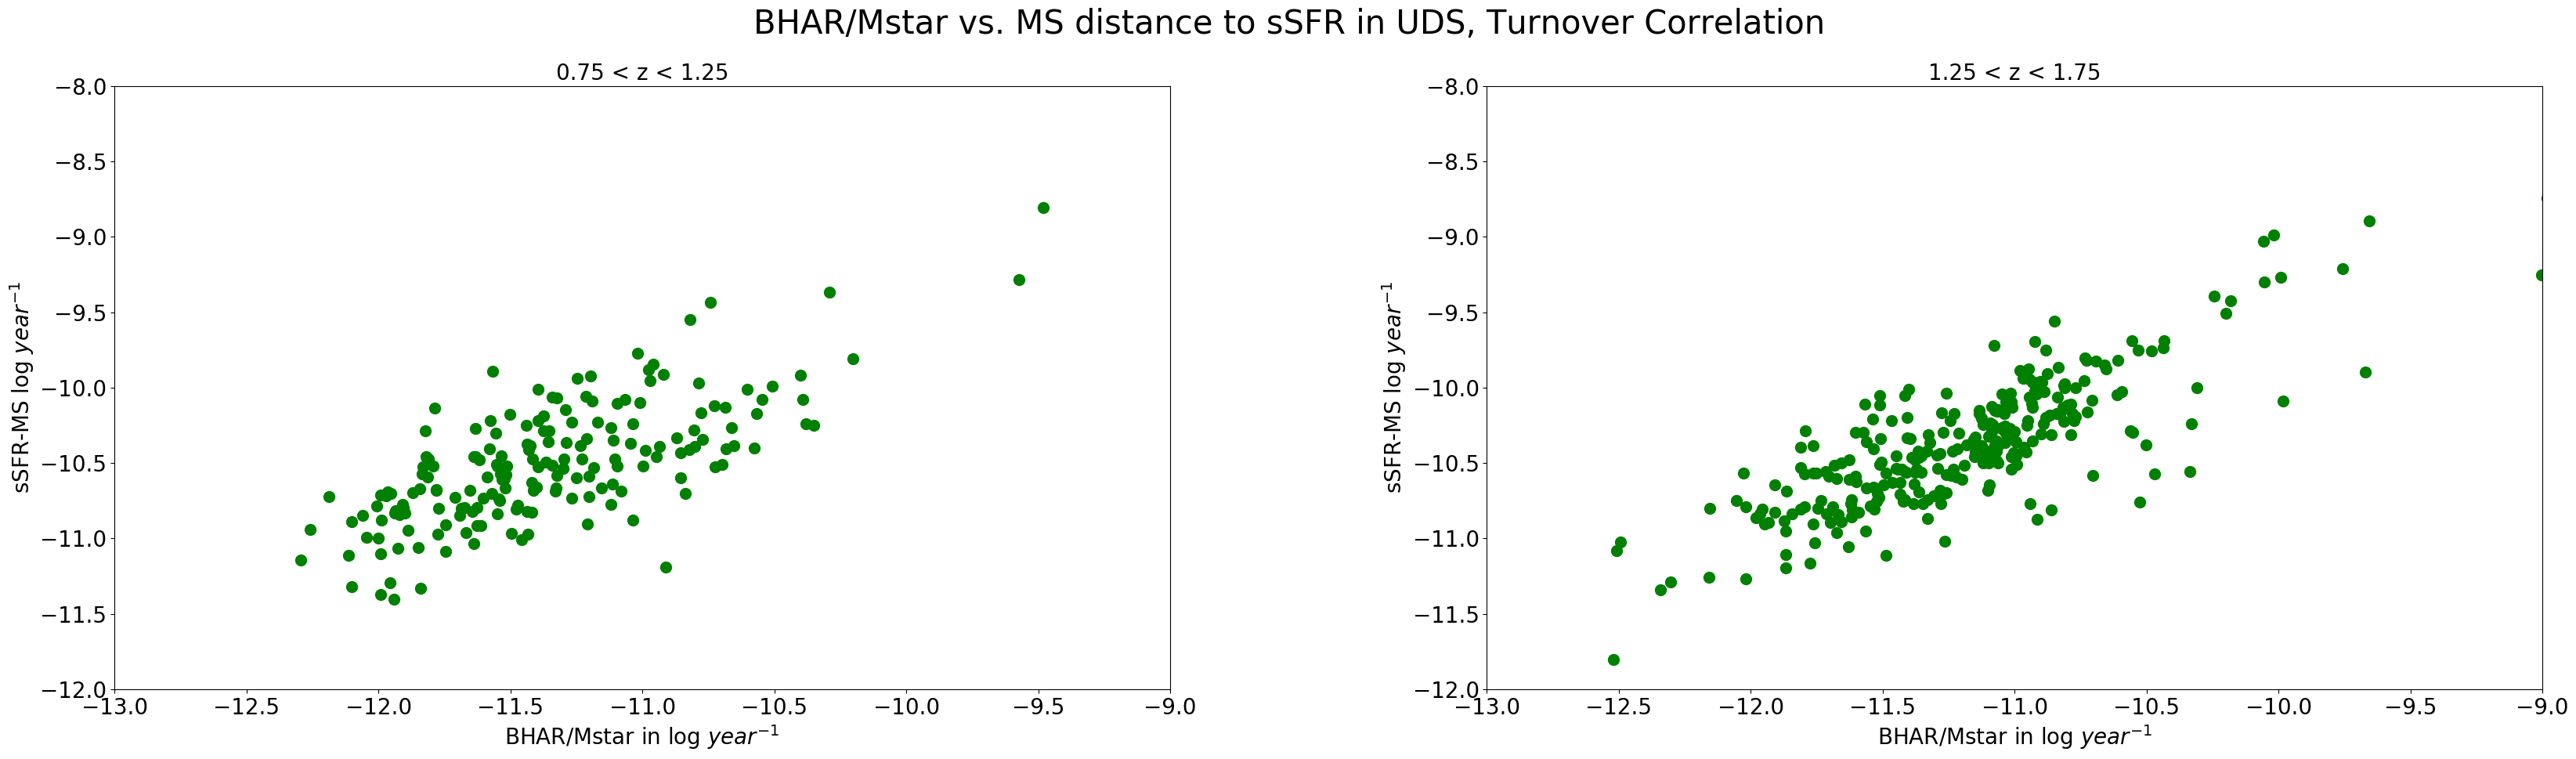

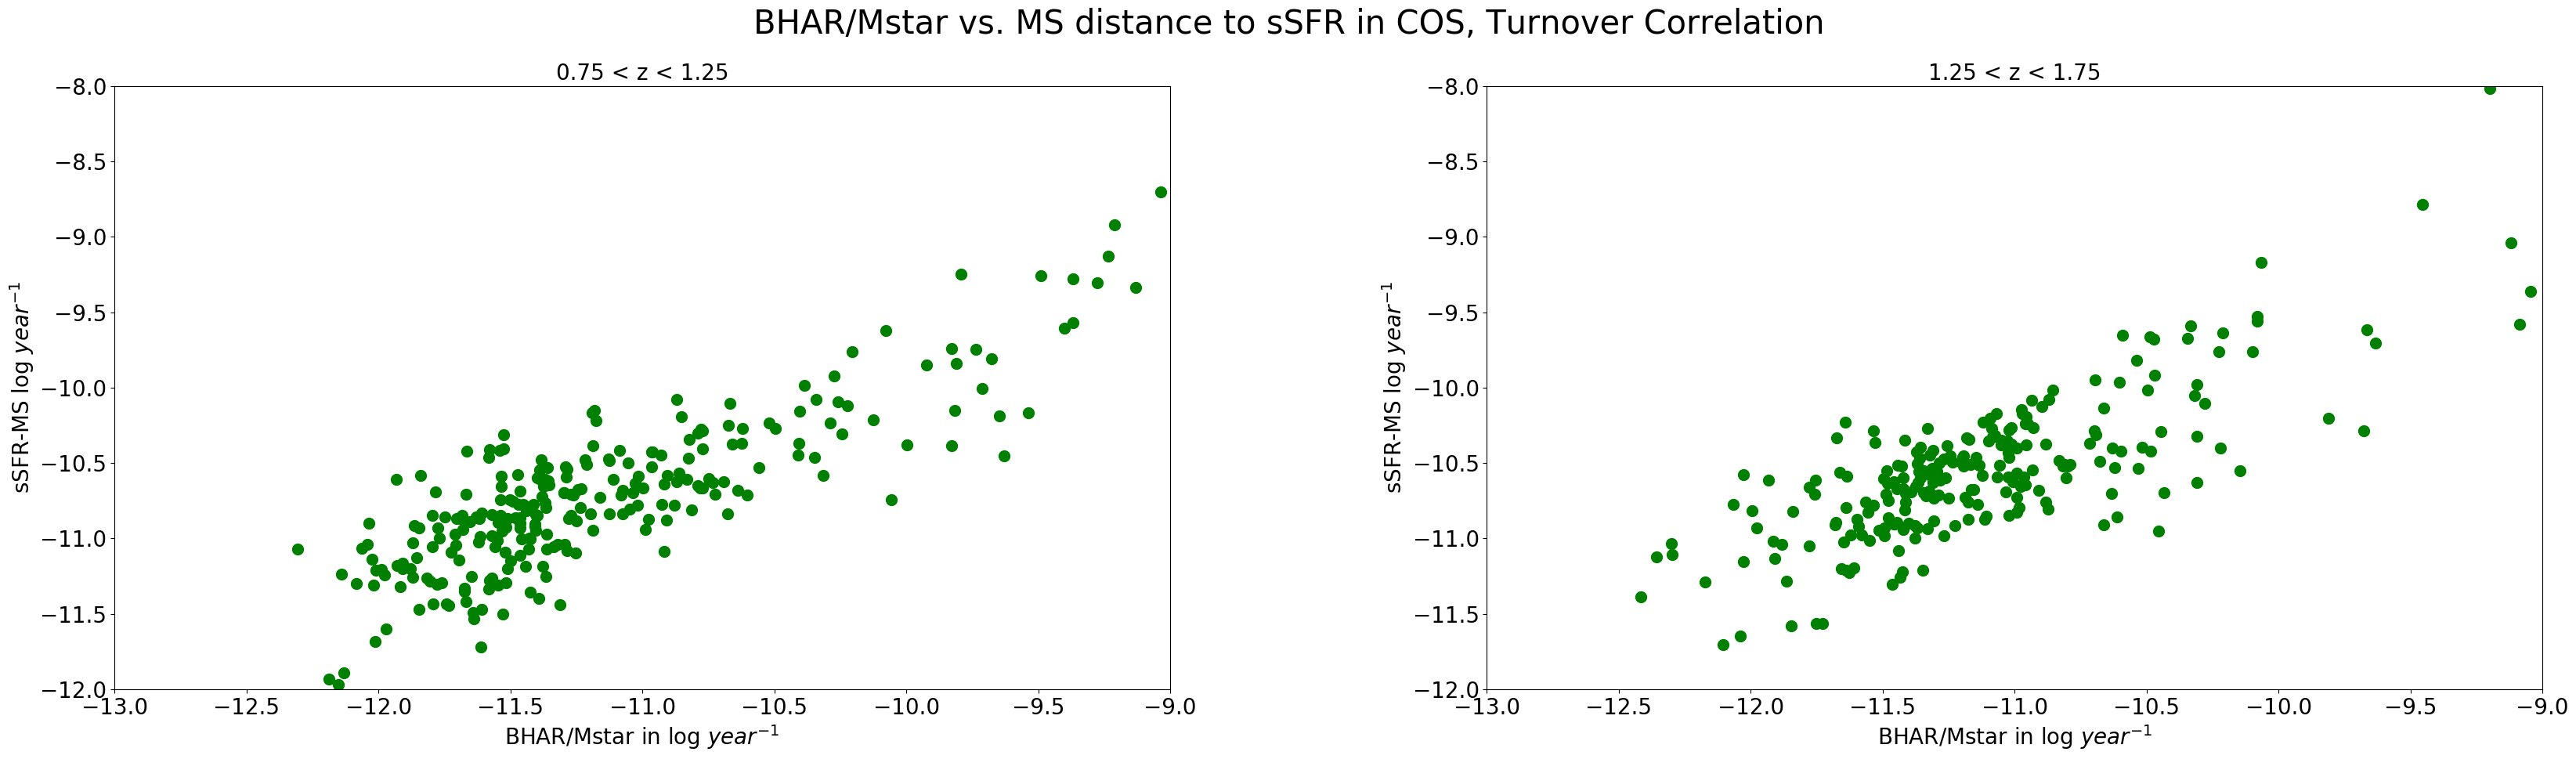

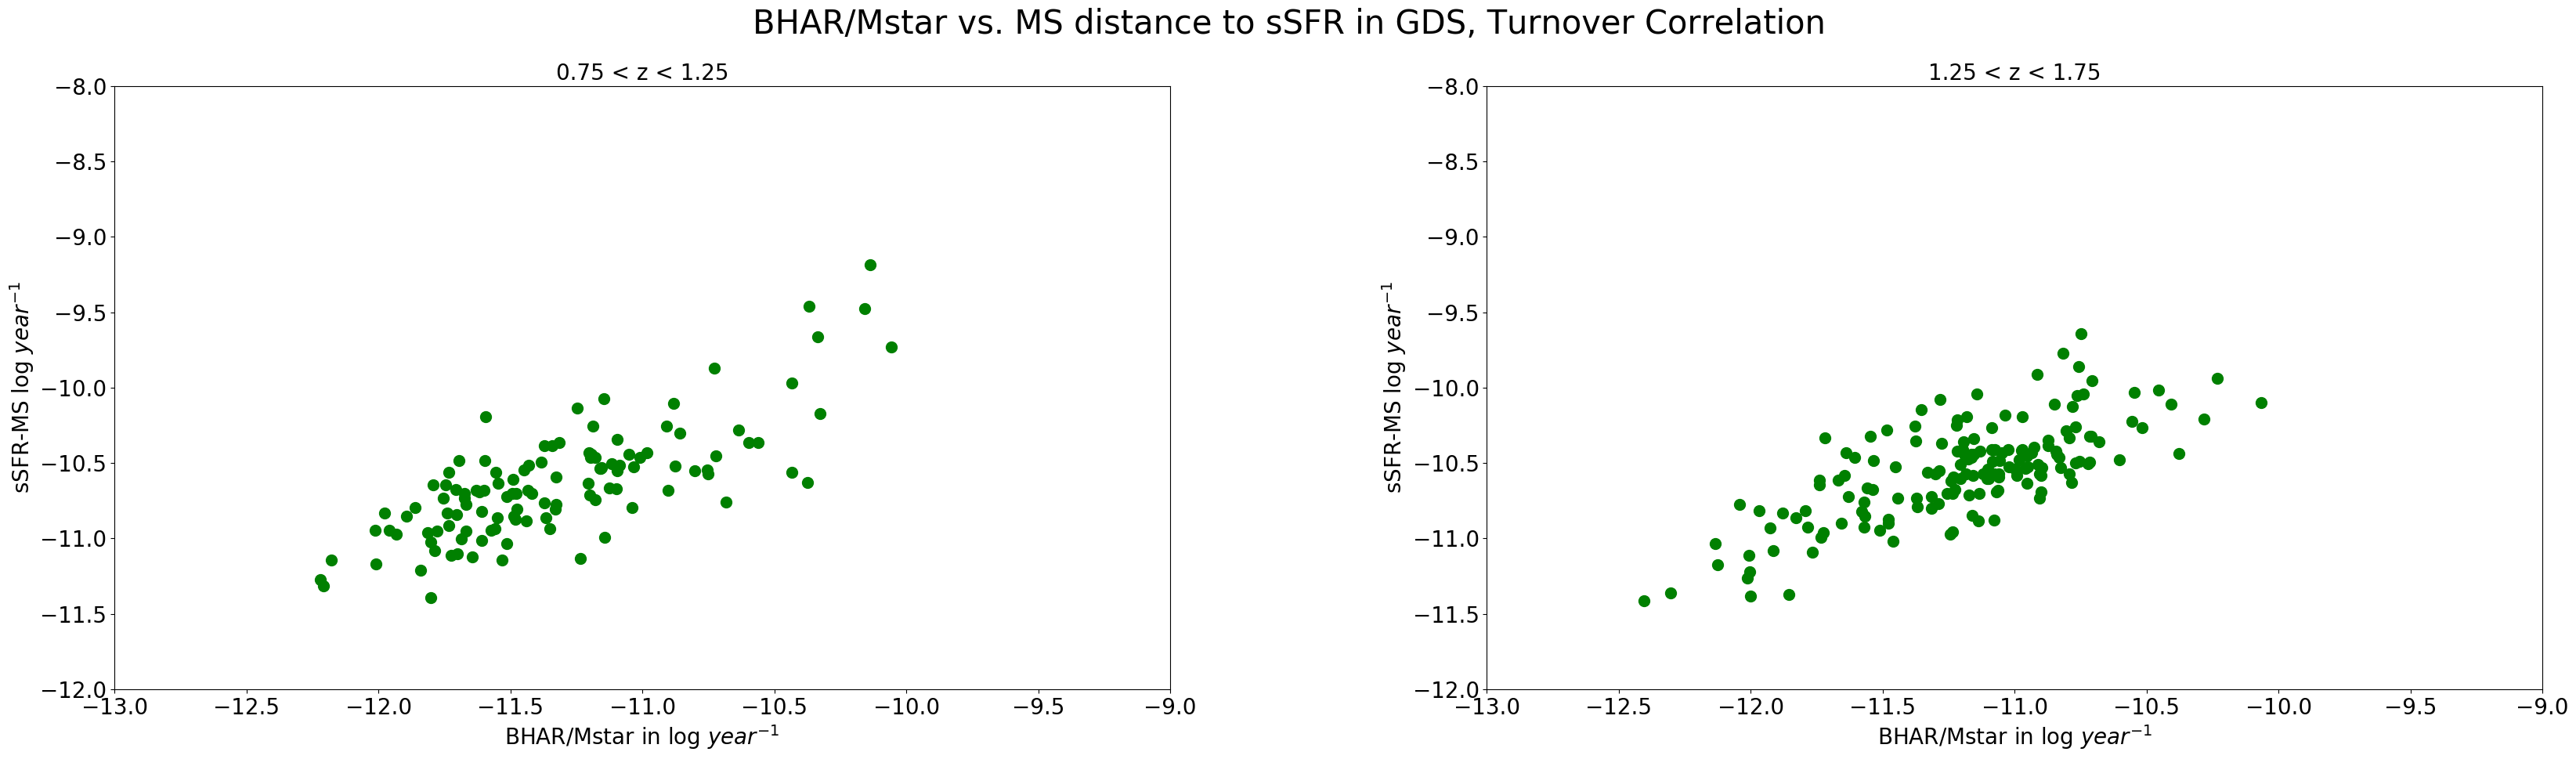

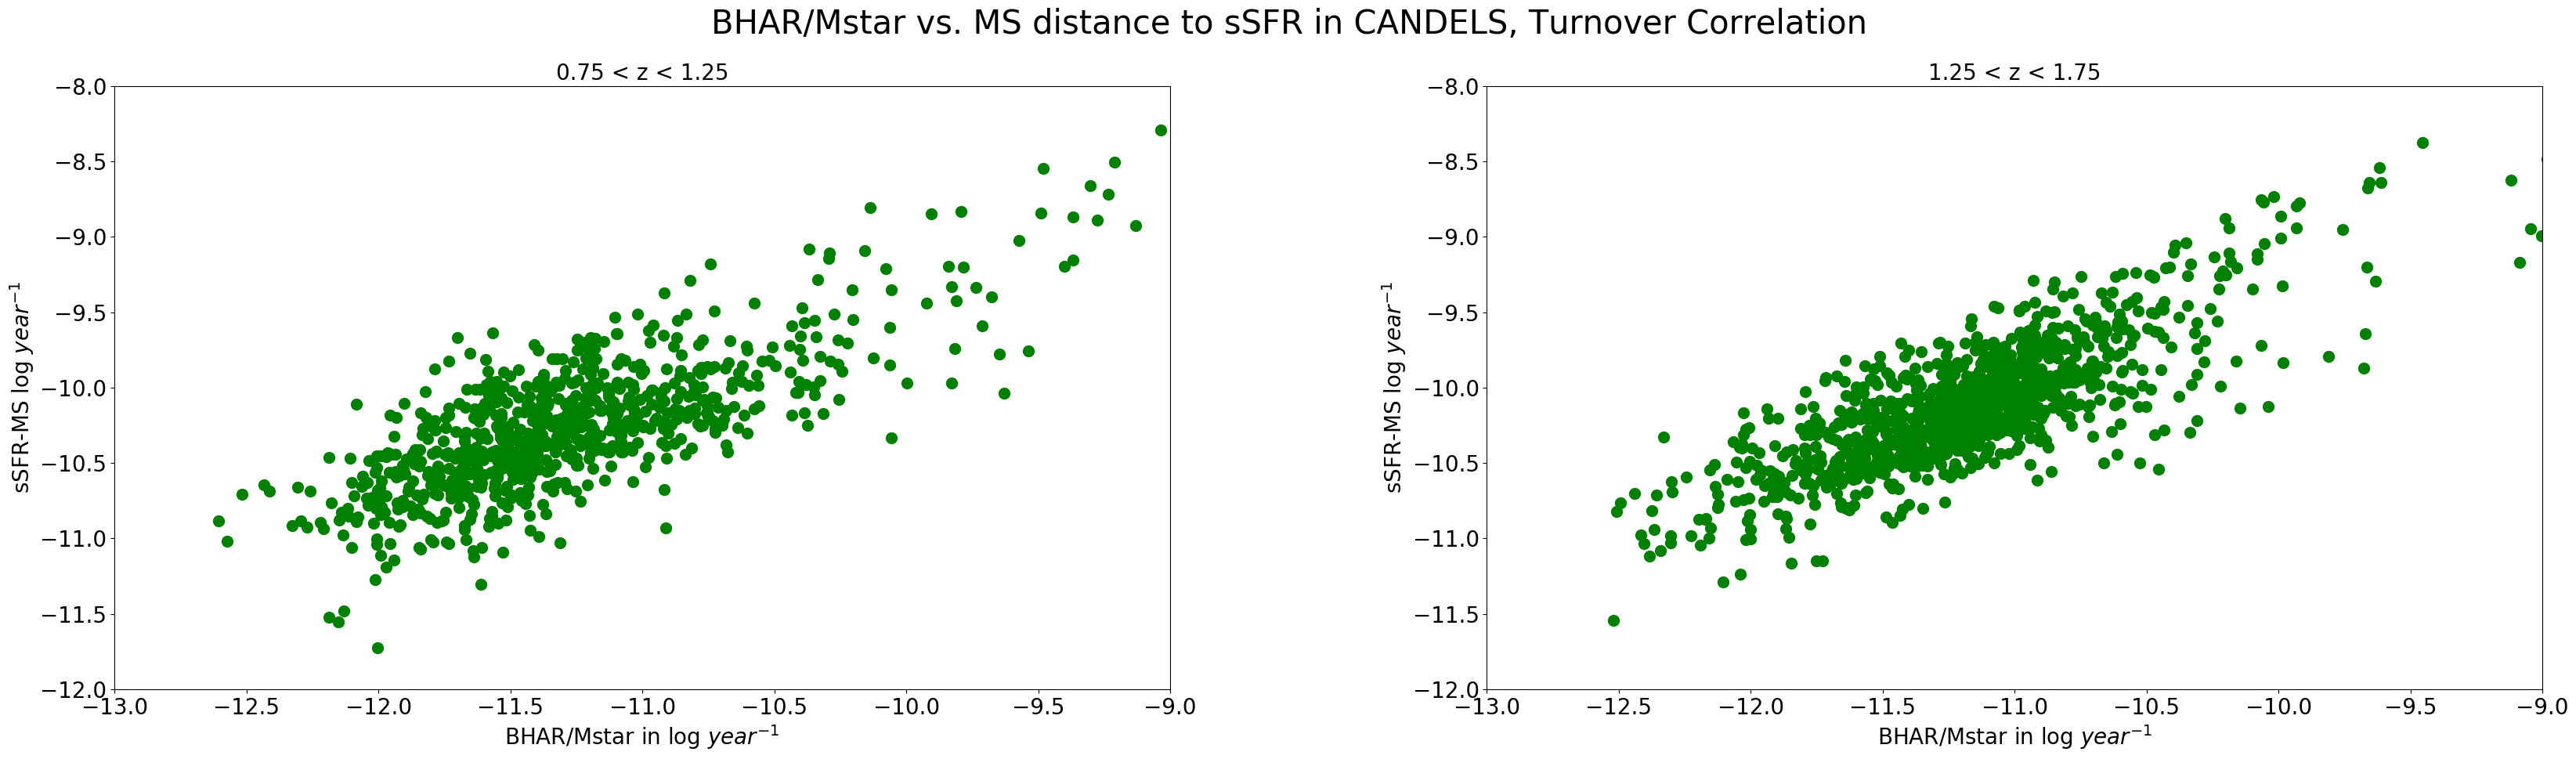

In [12]:
#------------Making scatterplots: BHAR vs. sSFR-MS turnover correlation-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm

#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)


def makeFig(k, v): 
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('BHAR/Mstar vs. MS distance to sSFR in ' +k+', Turnover Correlation', fontsize=30)

    t = ascii.read(k+'_distMS.txt')

    #lists
    ax = []
    titles = ['0.75','1.25','1.75']
    zbin = v

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('BHAR/Mstar in log ${year^{-1}}$', fontsize=20)
        ax[i].set_ylabel('sSFR-MS log ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(-12, -8)
        ax[i].set_xlim(-13, -9)

        #The data
        ax[i].scatter(t[zbin[i]:zbin[i+1]]['BHAR'] - t[zbin[i]:zbin[i+1]]['M_med'], 
                      t[zbin[i]:zbin[i+1]]['dist_MS'],s=100,facecolor=(0,0.5,0))

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        
    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_distsSFR_sBHAR_turnover.png', dpi=300, bbox_inches='tight')

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)

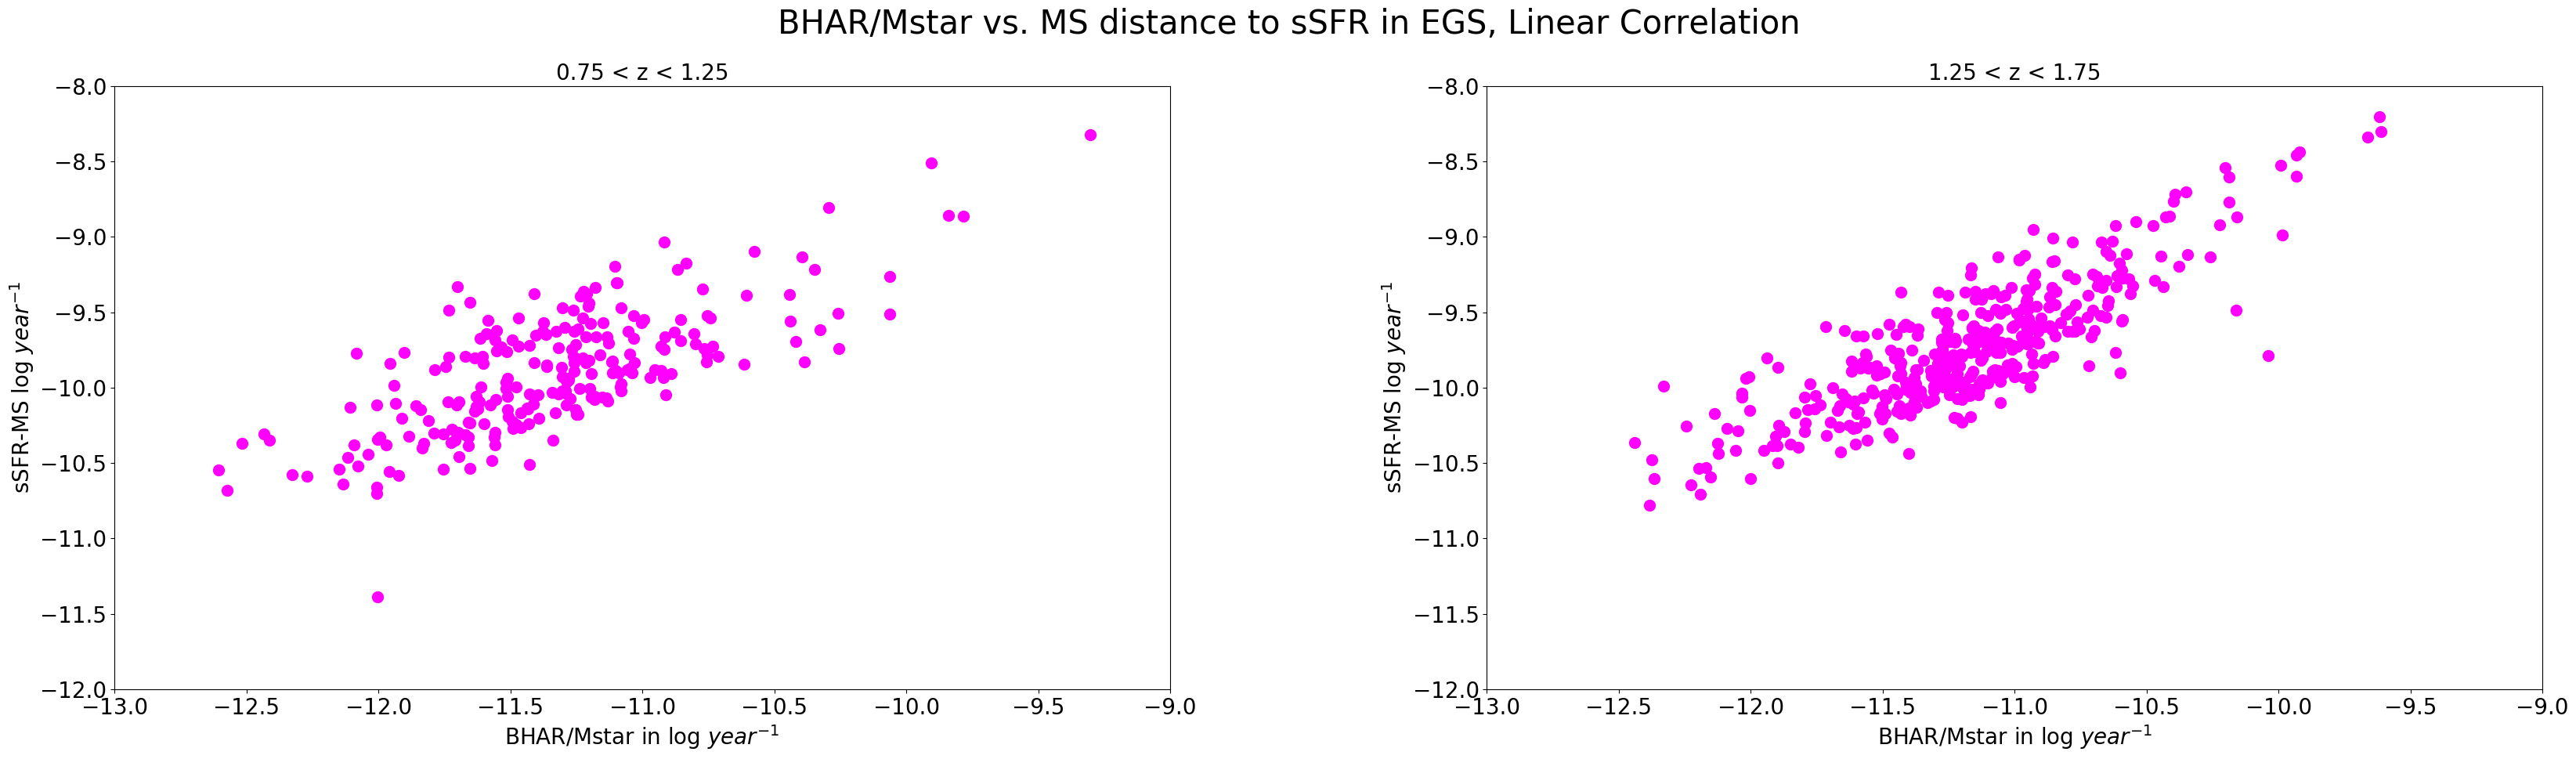

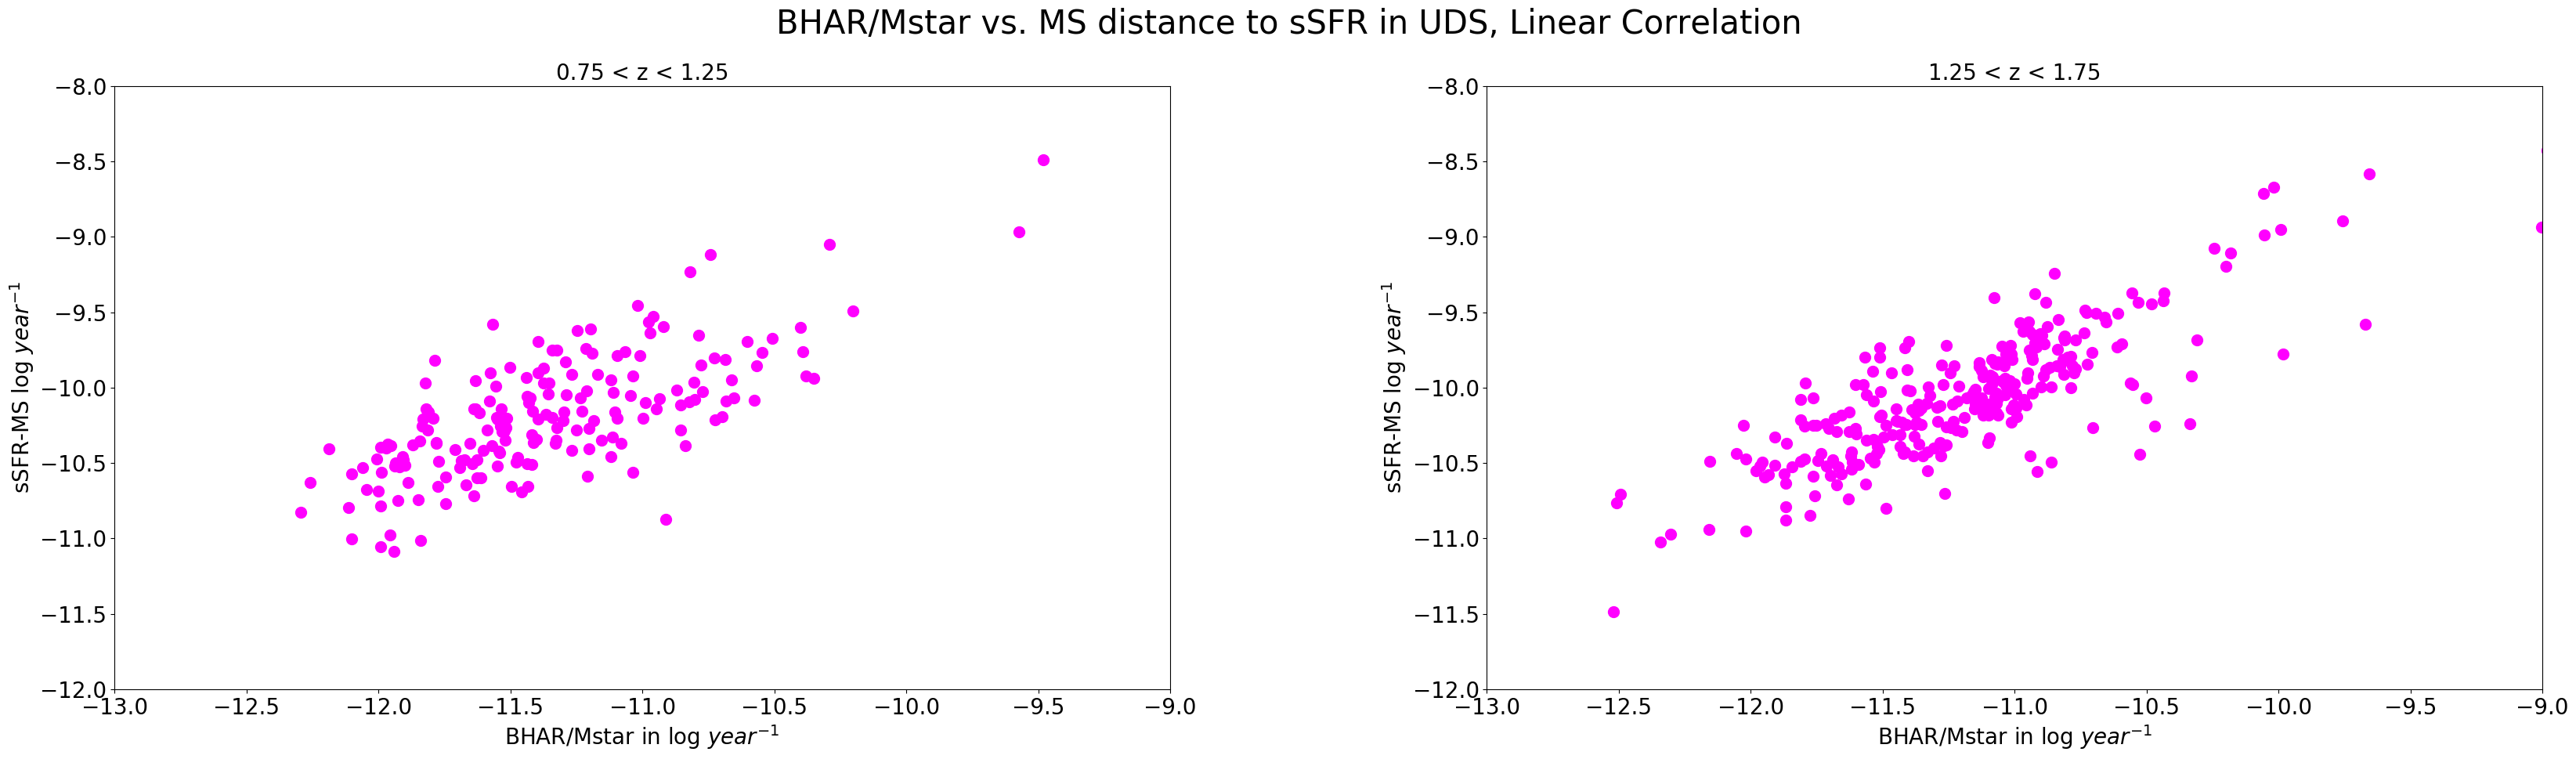

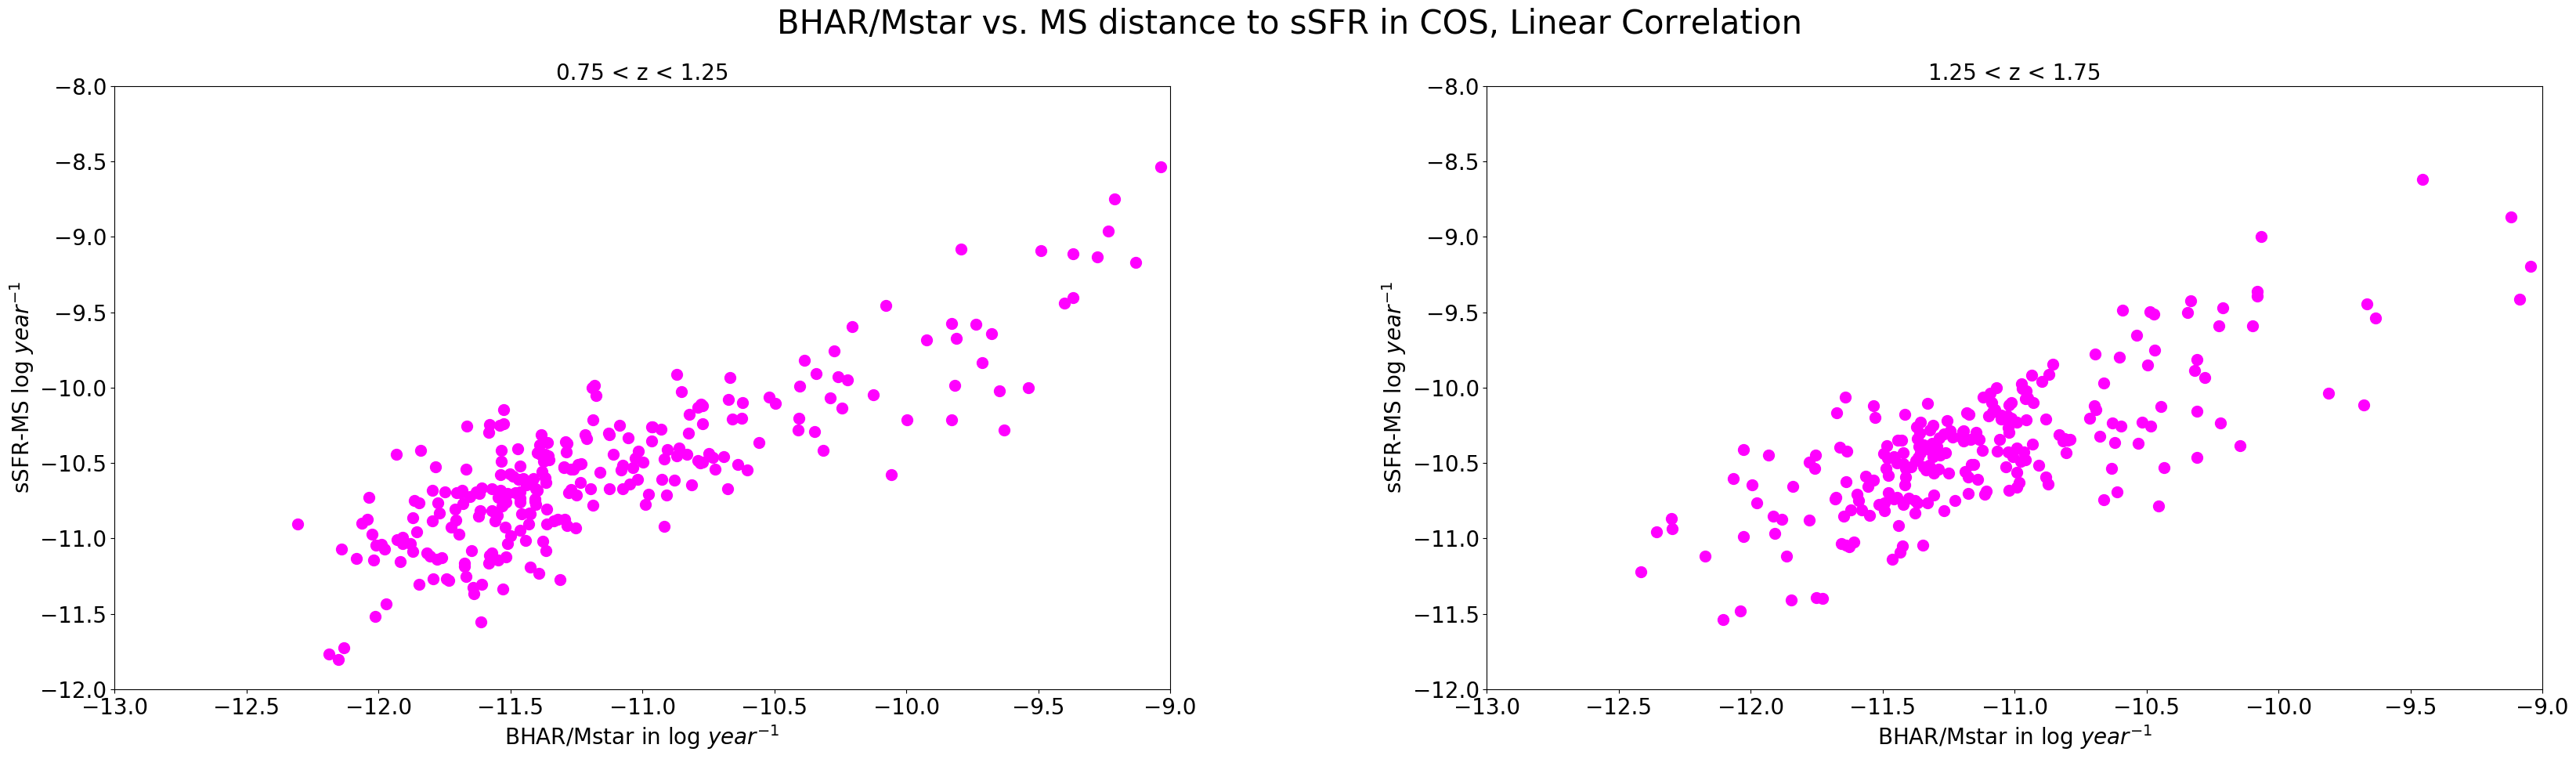

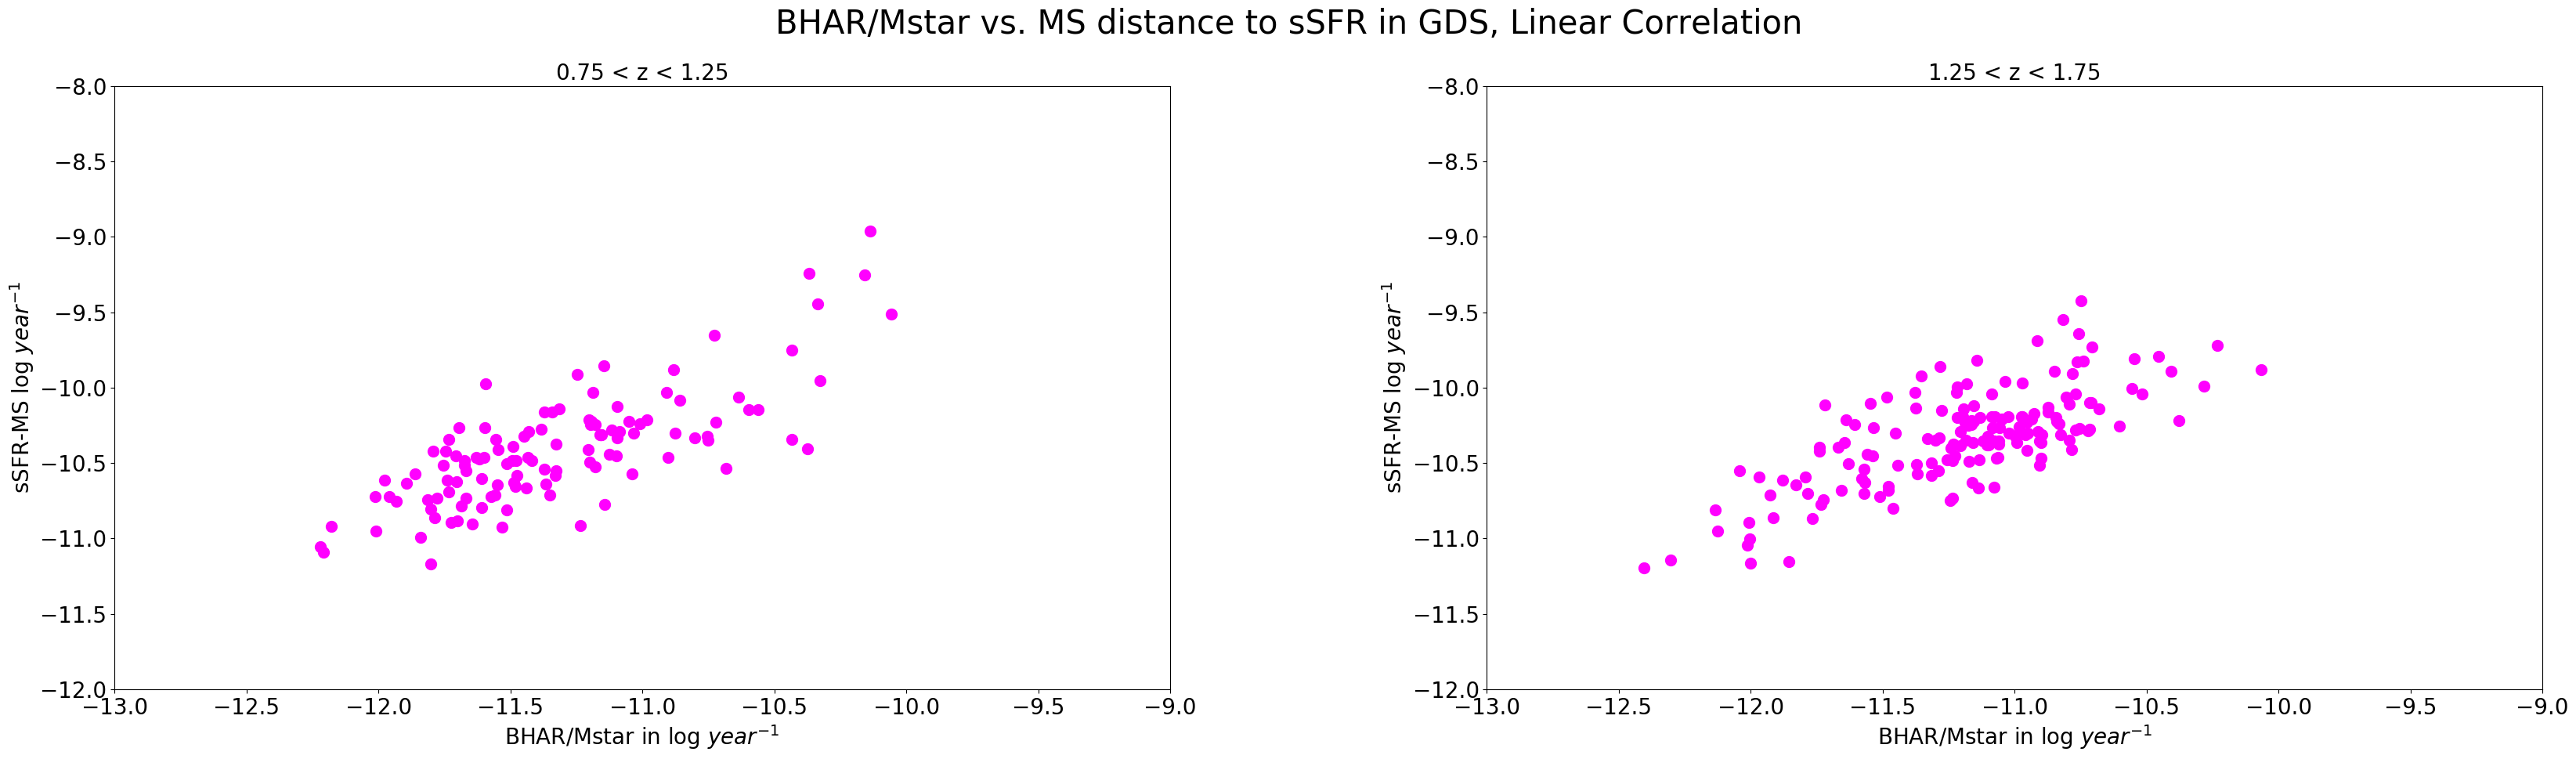

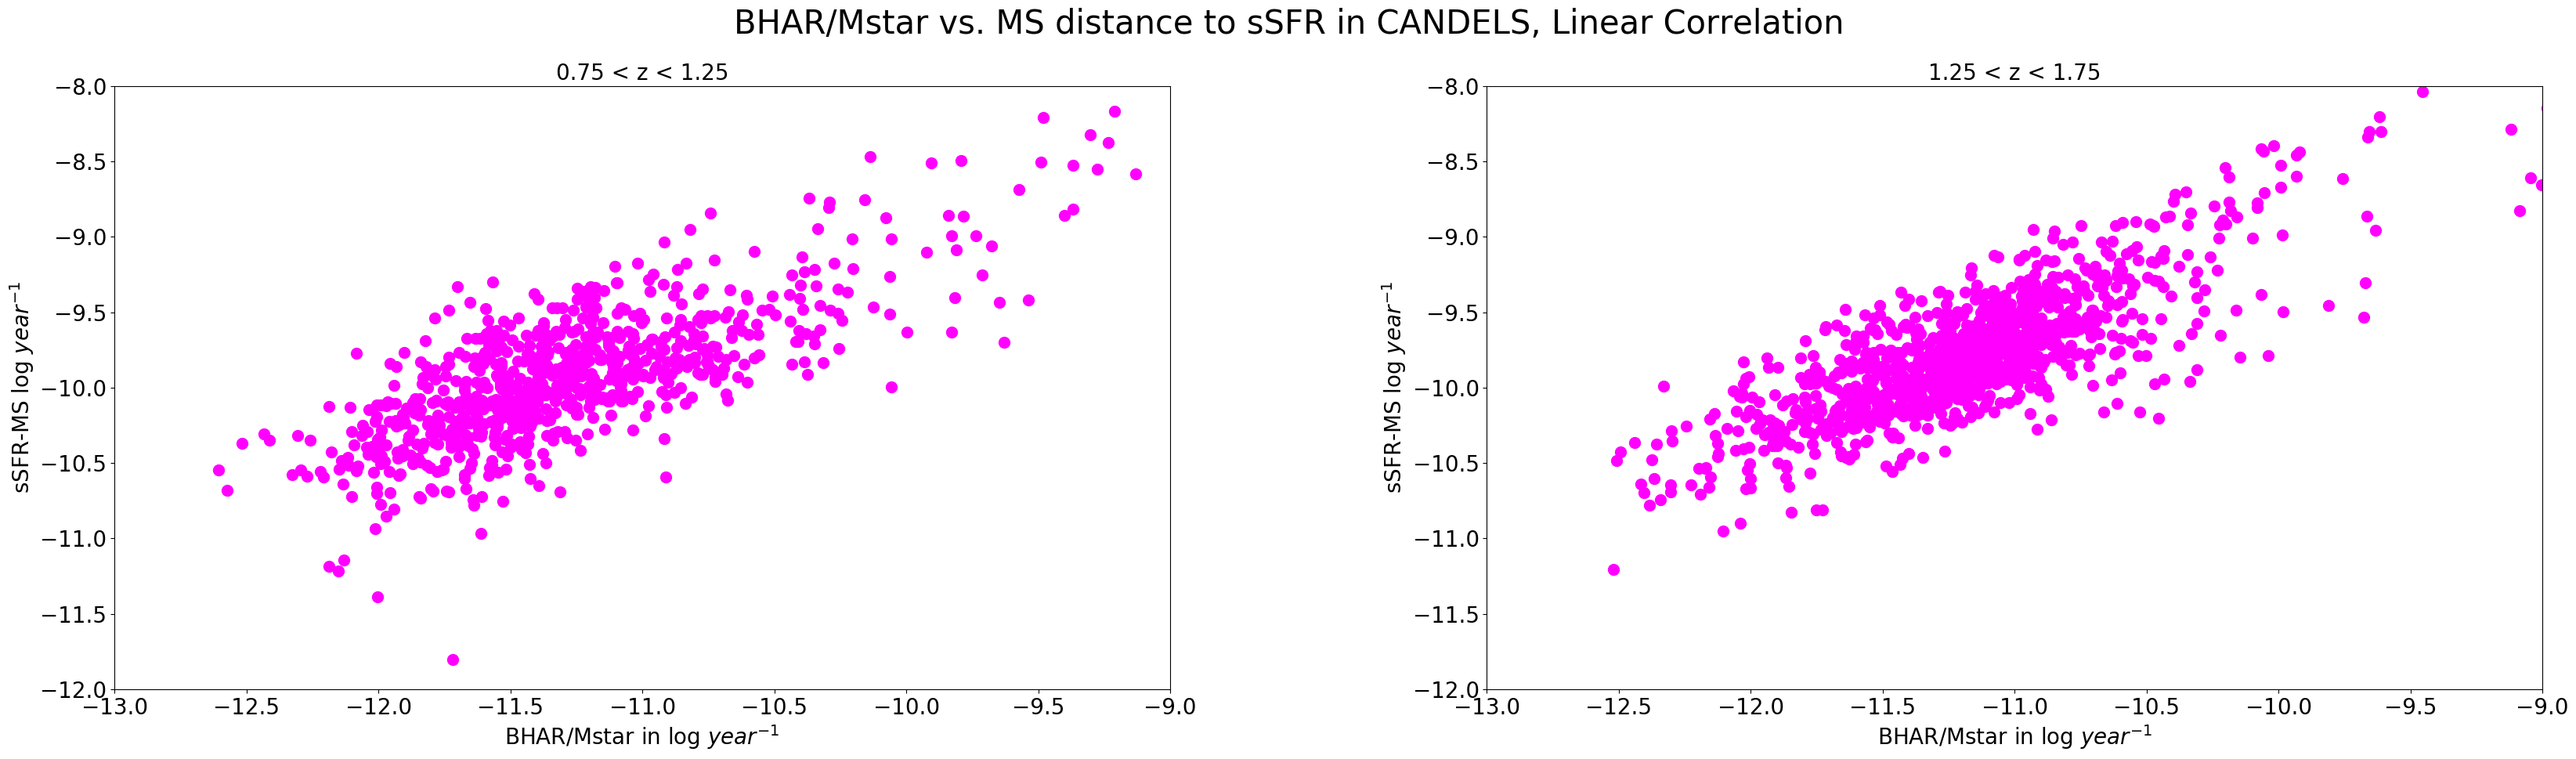

In [13]:
#------------Making scatterplots: BHAR vs. sSFR-MS turnover correlation-----------

#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline
from matplotlib import cm

#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)


def makeFig(k, v): 
    
    #Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(40,10)
    fig.suptitle('BHAR/Mstar vs. MS distance to sSFR in ' +k+', Linear Correlation', fontsize=30)

    t = ascii.read(k+'_distMS.txt')

    #lists
    ax = []
    titles = ['0.75','1.25','1.75']
    zbin = v

    #Setting up the grid
    for i in range(2):
        #Labels and titles
        ax.append(fig.add_subplot(1, 2, i+1))
        ax[i].set_xlabel('BHAR/Mstar in log ${year^{-1}}$', fontsize=20)
        ax[i].set_ylabel('sSFR-MS log ${year^{-1}}$', fontsize=20)
        ax[i].set_title(titles[i] + ' < z < ' + titles[i+1], fontsize=20)

        #Axis limits
        ax[i].set_ylim(-12, -8)
        ax[i].set_xlim(-13, -9)

        #The data
        ax[i].scatter(t[zbin[i]:zbin[i+1]]['BHAR'] - t[zbin[i]:zbin[i+1]]['M_med'], 
                      t[zbin[i]:zbin[i+1]]['dist_MS_lin'],s=100,facecolor=(1,0,1))

        #Tick mark label size
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        
    #Tune spacing between plots. 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    fig.savefig(k+'_distsSFR_sBHAR_lin.png', dpi=300, bbox_inches='tight')

names = {'CANDELS': [0,812,1898,2769],
         'COS': [0,265,507, 650], 
         'EGS': [0,241,640,1015], 
         'GDS': [0,119,279,416],
         'UDS': [0,187,472,688]}

for k, v in names.items():
    makeFig(k, v)